<a href="https://colab.research.google.com/github/scaairesearch/da_cv_fer/blob/main/experiment_model_improvement_v12_se_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DA CV FER

Objective
 - Re run of V12 a with 1 SE
 - change of val images from 1000 to 2000
 - Use of Weighted Loss Function
 - Previous results
  - Non DANN
    - SFEW VAL:  Average loss: 0.1901, Accuracy: 246/419 (58.71%) [SOTA]
    - RACE DS:   Test / Val: Average loss: 0.5212, Accuracy: 2543/8458 (30.07%)
  - DANN
    - SFEW VAL:  Test / Val: Average loss: 0.1708, Accuracy: 213/419 (50.84%)
    - RACE DS:  Test / Val: Average loss: 0.3323, Accuracy: 2679/8458 (31.67%)

  - EWC DANN
    - SFEW VAL: Test / Val: Average loss: 0.1554, Accuracy: 233/419 (55.61%)
    - RACE DS: Test / Val: Average loss: 0.3369, Accuracy: 2631/8458 (31.11%)


Observations
  - Non DANN
    - SFEW VAL:
    - RACE DS:   
  - DANN
    - SFEW VAL:  
    - RACE DS:  

  - EWC DANN
    - SFEW VAL:
    - RACE DS:
  


Models
  - 24_05_se_a


## Initializations
Cloning Repo, Dependencies installation, Libraries import and Config Initialization

In [1]:
# !pip install --upgrade Pillow

### Cloning Repo, Installing dependencies

In [2]:
!git clone https://github.com/scaairesearch/da_cv_fer
import os
os.getcwd()
os.chdir('da_cv_fer')

Cloning into 'da_cv_fer'...
remote: Enumerating objects: 580, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 580 (delta 53), reused 0 (delta 0), pack-reused 483
Receiving objects: 100% (580/580), 52.76 MiB | 13.24 MiB/s, done.
Resolving deltas: 100% (327/327), done.


In [3]:
!pip install -q -r requirements.txt # -q is for quiet install
# for some reason the below does not get installed with requirements
!pip install -q opendatasets
!pip install -q facenet_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [4]:
# Generic Libraries
import os
import zipfile

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

from tqdm import tqdm # for beautiful model training updates

import matplotlib.pyplot as plt # for plots

import time
from pathlib import Path

from copy import deepcopy
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import pandas as pd

In [5]:
# Installs from files
from da_cv_fer.data_config import DataConfig
from da_cv_fer.ds_sfew_crop import DatasetSFEWCROP
from da_cv_fer.ds_expw_crop_image_race import EXPWIMAGECROPRACE
from da_cv_fer.utils import *
from da_cv_fer.run_config import RunConfig

### Initializing Configs

In [6]:
#initializing dataconfig, it tells us about dataset configuration and directory structure
dataconfig = DataConfig()

##  Dataset
- SFEW Dataset
- Creating Dataloader object


In [7]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Creating Dataloader

In [8]:
sfew = DatasetSFEWCROP()
sfew_train_loader, sfew_val_loader = sfew.get_dataloader()
print(f' length of SFEW dataset : {len(sfew_train_loader.dataset)}')

 self.BASE_PATH -dataset, 
 self.EXTRACT_DIR-dataset/sfew,
 self.ZIP_FILE_PATH - dataset/SFEW_2.zip 
Directory dataset/sfew created successfully.
No files (including zip file) found in dataset/sfew.Copying file
Starting File copying from /content/gdrive/MyDrive/CV_FER/dataset/SFEW_2.zip to dataset/sfew
File copied successfully from /content/gdrive/MyDrive/CV_FER/dataset/SFEW_2.zip to dataset/sfew
Initiating extraction of dataset/sfew/SFEW_2.zip to dataset/sfew
...completed for dataset/sfew/SFEW_2.zip
dataset/sfew/Train Disgust.zip Disgust
...completed for dataset/sfew/Train/Disgust.zip
dataset/sfew/Train Happy.zip Happy
...completed for dataset/sfew/Train/Happy.zip
dataset/sfew/Train Surprise.zip Surprise
...completed for dataset/sfew/Train/Surprise.zip
dataset/sfew/Train Angry.zip Angry
...completed for dataset/sfew/Train/Angry.zip
dataset/sfew/Train Sad.zip Sad
...completed for dataset/sfew/Train/Sad.zip
dataset/sfew/Train Fear.zip Fear
...completed for dataset/sfew/Train/Fear.zip
da

### Example Images

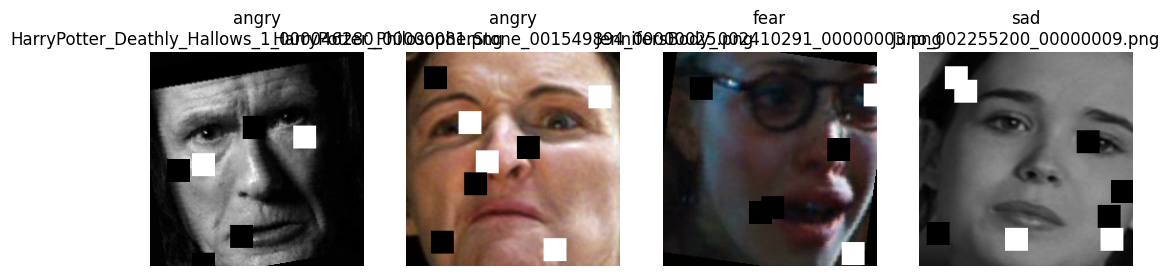

In [9]:
show_batch(sfew_train_loader,sfew.labels,4, normalized = False)

In [10]:
sfew_loader = {'name': 'sfew',
               'train':sfew_train_loader,
               'val':sfew_val_loader
               }
data_loader = {'source' : sfew_loader}
source_name = data_loader['source']['name']

## Model Performance Metrics

In [107]:
#TODO: Move to Utils

labels_map={0:"Angry",
            1:"Disgust",
            2:"Fear",
            3:"Happy",
            4:"Sad",
            5:"Surprise",
            6:"Neutral"}

def performance_metric(model,
                       device,
                       data_loader):
    model = model.to(device)
    model.eval() # evaluation mode

    # variables to track loss and accuracy
    test_loss = 0.0
    correct = 0
    true_labels = []
    predicted_labels = []

    # Disable gradient updation
    with torch.no_grad():
        # Iterate over each batch and fetch images and labels from the batch
        for batch_idx, batch in enumerate(data_loader):
          images, labels = batch[0].to(device), batch[1].to(device)

          class_output,_,_  = model((images*255)) # forward pass, output = {class}
          true_labels.extend(labels.argmax(dim=1).cpu().numpy())
          predicted_labels.extend(class_output.argmax(dim=1).cpu().numpy())
    # print(f'true labels - {true_labels}')
    # print(f'predicted labels - {predicted_labels}')

    true_labels = [labels_map[int_label] for int_label in true_labels]
    predicted_labels= [labels_map[int_label] for int_label in predicted_labels]

    # Compute accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    print("Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    print("Precision:", precision)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    class_names = list(labels_map.values())
    cm_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
    print("Confusion Matrix:")
    print(conf_matrix)
    print(cm_df)

    # Generate classification report
    class_report = classification_report(true_labels, predicted_labels)
    print("Classification Report:")
    print(class_report)

    return true_labels, predicted_labels, accuracy, precision, cm_df, class_report



## Model Initialization

### Model_V12_SE_A
- based on v8_SE
- including dann
- including grl
- With SE, only 1 for output of feature extraction


In [45]:

import torch
import torch.nn as nn
from torch.autograd import Function
import torch.nn.functional as F


class Vgg_vd_face_sfew_dag(nn.Module):

    def __init__(self):
        super(Vgg_vd_face_sfew_dag, self).__init__()
        self.meta = {'mean': [129.186279296875, 104.76238250732422, 93.59396362304688],
                     'std': [1, 1, 1],
                     'imageSize': [224, 224, 3]}
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu1_1 = nn.ReLU()
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu1_2 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu2_1 = nn.ReLU()
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu2_2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu3_1 = nn.ReLU()
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu3_2 = nn.ReLU()
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu3_3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu4_1 = nn.ReLU()
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu4_2 = nn.ReLU()
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu4_3 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu5_1 = nn.ReLU()
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu5_2 = nn.ReLU()
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu5_3 = nn.ReLU()
        self.pool5 = nn.MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
        self.fc6 = nn.Conv2d(512, 4096, kernel_size=[7, 7], stride=(1, 1))
        self.relu6 = nn.ReLU()
        self.fc7 = nn.Linear(in_features=4096, out_features=4096, bias=True)
        self.relu7 = nn.ReLU()
        self.fc8 = nn.Linear(in_features=4096, out_features=7, bias=True)

    def forward(self, data):
        x1 = self.conv1_1(data)
        x2 = self.relu1_1(x1)
        x3 = self.conv1_2(x2)
        x4 = self.relu1_2(x3)
        x5 = self.pool1(x4)
        x6 = self.conv2_1(x5)
        x7 = self.relu2_1(x6)
        x8 = self.conv2_2(x7)
        x9 = self.relu2_2(x8)
        x10 = self.pool2(x9)
        x11 = self.conv3_1(x10)
        x12 = self.relu3_1(x11)
        x13 = self.conv3_2(x12)
        x14 = self.relu3_2(x13)
        x15 = self.conv3_3(x14)
        x16 = self.relu3_3(x15)
        x17 = self.pool3(x16)
        x18 = self.conv4_1(x17)
        x19 = self.relu4_1(x18)
        x20 = self.conv4_2(x19)
        x21 = self.relu4_2(x20)
        x22 = self.conv4_3(x21)
        x23 = self.relu4_3(x22)
        x24 = self.pool4(x23)
        x25 = self.conv5_1(x24)
        x26 = self.relu5_1(x25)
        x27 = self.conv5_2(x26)
        x28 = self.relu5_2(x27)
        x29 = self.conv5_3(x28)
        x30 = self.relu5_3(x29)
        x31 = self.pool5(x30)
        x32 = self.fc6(x31) # this is a conv layer, this is the output we need
        x33_preflatten = self.relu6(x32)
        x33 = x33_preflatten.view(x33_preflatten.size(0), -1)
        x34 = self.fc7(x33)
        x35 = self.relu7(x34)
        prediction = self.fc8(x35)
        return prediction


def vgg_vd_face_sfew_dag(weights_path=None, **kwargs):
    """
    load imported model instance

    Args:
        weights_path (str): If set, loads model weights from the given path
    """
    model = Vgg_vd_face_sfew_dag()
    if weights_path:
        state_dict = torch.load(weights_path)
        model.load_state_dict(state_dict)
    return model

In [46]:
model_pretrained = vgg_vd_face_sfew_dag(weights_path="/content/gdrive/MyDrive/CV_FER/weights/vgg_vd_face_sfew_dag.pth")

In [47]:
model_pretrained

Vgg_vd_face_sfew_dag(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_1): ReLU()
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_2): ReLU()
  (pool1): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_1): ReLU()
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_2): ReLU()
  (pool2): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_1): ReLU()
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_2): ReLU()
  (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_3): ReLU()
  (pool3): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_m

In [48]:
import torch.nn as nn
import torch
from torch.autograd import Function
import torch.nn.functional as F


class SEBlock(nn.Module):
    def __init__(self, in_channels, reduction_ratio=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction_ratio),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction_ratio, in_channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        batch_size, num_channels, _, _ = x.size()
        y = self.avg_pool(x).view(batch_size, num_channels)
        y = self.fc(y).view(batch_size, num_channels, 1, 1)
        return x * y.expand_as(x)


class GradientReversalFn(Function):
    @staticmethod
    def forward(ctx, x, alpha):
        ctx.alpha = alpha

        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        output = grad_output.neg() * ctx.alpha

        return output, None

class DANN_VGG_SE(nn.Module):
    def __init__(self,
                 model_pretrained = model_pretrained,
                 num_classes=7,
                 dropout_rate = 0.1,
                 ):
        super(DANN_VGG_SE, self).__init__()
        #---------------------Feature Extractor Network------------------------#
        list_feature_extractor = list(model_pretrained.children())[:-4]

        # SE Block
        # self.se_block = SEBlock(512)
        # list_feature_extractor.insert(-15,  SEBlock(256))
        # list_feature_extractor.insert(-8,  SEBlock(512))

        # SE Block
        list_feature_extractor.insert(-1,  SEBlock(512))

        self.feature_extractor = nn.Sequential(*list_feature_extractor)


        # self.feature_extractor = nn.Sequential(*list(model_pretrained.children())[:-4])

        #---------------------Class Classifier------------------------#
        list_class_classifer = list(model_pretrained.children())[-4:]
        list_class_classifer.insert(2, nn.Dropout(dropout_rate))
        self.class_classifier = nn.Sequential(*list_class_classifer)



        #---------------------Domain Classifier------------------------#

        self.domain_classifier = nn.Sequential(nn.ReLU(),
                                               nn.Linear(4096, 4096),
                                               nn.Dropout(dropout_rate),
                                               nn.ReLU(),
                                               nn.Linear(4096, 2)
                                               )

        # Initialize the 4096,4096 to pre-trained
        pretrained_weights = model_pretrained.fc7.weight
        pretrained_biases = model_pretrained.fc7.bias
        with torch.no_grad():
          self.domain_classifier[1].weight.copy_(pretrained_weights)
          self.domain_classifier[1].bias.copy_(pretrained_biases)


    def forward(self, input_data, alpha = 0.0):
        features = self.feature_extractor(input_data)
        # print("features.shape......", features.shape)
        features = features.view(-1,features.size(1))
        # print("features.shape after view......", features.shape)

        reverse_features = GradientReversalFn.apply(features,alpha)

        class_output = self.class_classifier(features)
        domain_output = self.domain_classifier(reverse_features)

        return class_output, domain_output, features


In [49]:
model = DANN_VGG_SE(model_pretrained = model_pretrained, num_classes=7)
from torchsummary import summary  #for model summary and params
print(model)

DANN_VGG_SE(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(2

In [50]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [51]:
from torchsummary import summary
summary(model.to(device), (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [19]:
# !pip install torch-summary

In [20]:
# from torchsummary import summary
# summary(model, (3, 224, 224), col_names = ["input_size", "output_size", "num_params", "kernel_size", "mult_adds"], verbose =2 )

## Checking accuracy before fine tuning

In [21]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [52]:
model = model.to(device=device)

### Test Function

In [23]:
def get_correct_preds(prediction, labels):
    """
    Function to return total number of correct predictions
    :param prediction: Model predictions on a given sample of data
    :param labels: Correct labels of a given sample of data
    :return: Number of correct predictions
    """
    return prediction.argmax(dim=1).eq(labels.argmax(dim=1)).sum().item()

In [24]:
# def test_model_local(model, device, data_loader, mode= 'test',
#                class_loss_function = nn.CrossEntropyLoss() ):
#     model = model.to(device)
#     model.eval() # evaluation mode

#     # variables to track loss and accuracy
#     test_loss = 0.0
#     correct = 0
#     pbar = tqdm(data_loader) # putting the dataloader in progress bar


#     # Disable gradient updation
#     with torch.no_grad():
#         # Iterate over each batch and fetch images and labels from the batch
#         for batch_idx, batch in enumerate(pbar):
#         # for batch_idx, batch in enumerate(data_loader):
#             images, labels = batch[0].to(device), batch[1].to(device)

#             class_output,_,_  = model((images*255)) # forward pass, output = {class}
#             class_loss = class_loss_function(class_output,labels) # Calculate Loss

#             test_loss += class_loss.item() # sum up batch loss

#             # Sum up batch correct predictions
#             correct += get_correct_preds(class_output, labels)

#     # Calculate test loss for a epoch
#     test_loss /= len(data_loader.dataset)

#     pbar.set_description(desc= f'Test / Val: Average loss={test_loss.item(): 0,2f} Accuracy={correct}/{len(data_loader.dataset)}({100*correct/len(data_loader.dataset):0.2f}%)')


#     # print('Test / Val: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(test_loss, correct, len(data_loader.dataset),
#     #     100. * correct / len(data_loader.dataset)))


#     return correct, test_loss

In [25]:
def test_model_local(model, device, data_loader, mode= 'test',
               class_loss_function = nn.CrossEntropyLoss() ):
    model = model.to(device)
    model.eval() # evaluation mode

    # variables to track loss and accuracy
    test_loss = 0.0
    correct = 0


    # Disable gradient updation
    with torch.no_grad():
        # Iterate over each batch and fetch images and labels from the batch
        for batch_idx, batch in enumerate(data_loader):
            images, labels = batch[0].to(device), batch[1].to(device)

            class_output,_,_  = model((images*255)) # forward pass, output = {class}
            class_loss = class_loss_function(class_output,labels) # Calculate Loss

            test_loss += class_loss.item() # sum up batch loss

            # Sum up batch correct predictions
            correct += get_correct_preds(class_output, labels)

    # Calculate test loss for a epoch
    test_loss /= len(data_loader.dataset)

    print('Test / Val: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(test_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))


    return correct, test_loss

#### Pre fine train metric

In [53]:
correct, test_loss = test_model_local(model, device, data_loader['source']['val'], mode= 'test')
correct, test_loss

Test / Val: Average loss: 0.2959, Accuracy: 115/419 (27.45%)



(115, 0.29591218725309165)

In [54]:
true_labels, predicted_labels, accuracy, precision, conf_matrix, class_report = performance_metric(model= model,
                                                                                                   device= device,
                                                                                                   data_loader = data_loader['source']['val'], # source val loader
                                                                                                   )

Accuracy: 0.2744630071599045
Precision: 0.32091654512522755
Confusion Matrix:
[[18 15  1 10 21  7  3]
 [ 0  5  0  9  5  1  2]
 [ 4  3  4  5 13  8  6]
 [ 0  0  0 62  7  3  0]
 [ 5  2  2  7 12 10 14]
 [ 2  8  0  7 58  5  4]
 [ 0  3  3 13 12 31  9]]
          Angry  Disgust  Fear  Happy  Sad  Surprise  Neutral
Angry        18       15     1     10   21         7        3
Disgust       0        5     0      9    5         1        2
Fear          4        3     4      5   13         8        6
Happy         0        0     0     62    7         3        0
Sad           5        2     2      7   12        10       14
Surprise      2        8     0      7   58         5        4
Neutral       0        3     3     13   12        31        9
Classification Report:
              precision    recall  f1-score   support

       Angry       0.62      0.24      0.35        75
     Disgust       0.14      0.23      0.17        22
        Fear       0.40      0.09      0.15        43
       Happy     

### Reuse existing model if applicable

In [28]:
# ## from data_config import DataConfig
# dataconfig_1 = DataConfig()
# MODEL_DIR = dataconfig_1.MODEL_DIR
# target_name = "expw"
## model_name = 'non_dann_sfew_expw_24_05_se_a.pt'

# MODEL_PATH = Path(os.path.join(MODEL_DIR, f'non_dann_{source_name}_{target_name}', model_name))

# best_model =  DANN_VGG_SE(model_pretrained = model_pretrained, num_classes=7)  # skeleton copy

# best_model.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device(device)))
# best_model.to(device)

### Train Function

#### Basic Training Function

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch.nn.functional as F

def train_model_local(model, train_loader, criterion, optimizer, device='cuda'):
    model.to(device)
    model.train()
    # for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0

    for inputs, labels,_ in train_loader:
        inputs = inputs * 255.0  # Convert inputs from [0, 1] to [0, 255]
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs,_,_ = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        correct += get_correct_preds(outputs, labels)


    epoch_loss = running_loss / len(train_loader.dataset)
    length_dataset = len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy : {correct}/{length_dataset} Or {100. * correct / length_dataset: .2f} %')

    return



#### Training Function with LR Scheduler

In [30]:
def train_model_local_lr(model,device, data_loader, optimizer, epoch,
                class_loss_function = nn.CrossEntropyLoss() ):
    print(f'epoch = {epoch+1}...in training function')
    model.to(device)
    model.train() # setting model to training


    pbar = tqdm(data_loader) # putting the dataloader in progress bar

    processed = 0 # to understand accuracy, used in denominator
    epoch_loss = 0.0
    correct = 0

    for batch_idx, batch in enumerate(pbar):
        batch[0] = batch[0] * 255.0  # Convert inputs from [0, 1] to [0, 255]
        images, labels = batch[0].to(device), batch[1].to(device) # batch of images and labels


        optimizer.zero_grad() # setting gradients to zero to avoid accumulation

        class_output, _ , _ = model(images) # forward pass, output = {class, domain, feature}

        class_loss = class_loss_function(class_output,labels) # Calculate Loss
        epoch_loss += class_loss.item()
        # Sum up batch correct predictions
        correct += get_correct_preds(class_output, labels)

        class_loss.backward() #backpropogation, creating gradients

        optimizer.step() # updating the params

        processed += len(images)
        curr_lr = optimizer.param_groups[0]['lr']

        pbar.set_description(desc= f'Loss={class_loss.item()} Accuracy={correct}/{processed}({100*correct/processed:0.2f}%) Epoch Avg loss={epoch_loss/processed:0.8f} LR={curr_lr:0.6f}')

    return float("{:.8f}".format(epoch_loss/processed)),  curr_lr


In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### Execution without Learning Rate

In [32]:
# num_epochs=55
# for epoch in range(num_epochs):
#   train_model_local(model = model, train_loader = data_loader['source']['train'], criterion = criterion, optimizer=optimizer)
#   test_model_local(model, device, data_loader['source']['val'], class_loss_function= criterion, mode= 'test')
# print('Training finished.')

### Weighted test function

In [33]:
import torch

# Assuming train_loader is your DataLoader
all_labels = []

for batch in data_loader['source']['train']:
  all_labels.append(batch[1])



In [34]:
# Concatenate all labels into a single tensor
all_labels = torch.cat(all_labels)

# Assuming labels are one-hot encoded
all_labels_indices = torch.argmax(all_labels, dim=1)

In [35]:
# all_labels_indices

In [36]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert to numpy array for compatibility with compute_class_weight
all_labels_indices_np = all_labels_indices.numpy()

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(all_labels_indices_np), y=all_labels_indices_np)
class_weights = torch.tensor(class_weights, dtype=torch.float)

print(f'Class weights: {class_weights}')

Class weights: tensor([0.7539, 2.0703, 1.4821, 0.6689, 0.9058, 0.8255, 1.4177])


### Execution with LR

In [56]:
runconfig = RunConfig()
device = runconfig.device

model = DANN_VGG_SE(model_pretrained = model_pretrained, num_classes=7).to(device=device)
best_model = DANN_VGG_SE(model_pretrained = model_pretrained, num_classes=7).to(device=device)

#learning rate
lr =  0.001 #float(runconfig.inital_lr)

# Epochs
EPOCHS = runconfig.NUM_EPOCHS
# EPOCHS = 2 #override
print("EPOCHS", EPOCHS)

# ReduceLRonPlateau Scheduler Params
scheduler_patience = 8 #runconfig.scheduler_patience
scheduler_factor = runconfig.scheduler_factor
scheduler_threshold = 25 #runconfig.scheduler_threshold

# Early stopping params
early_stop_patience = 20 #runconfig.early_stop_patience
early_stop_difference = 15 #runconfig.early_stop_difference

# optimizer
optimizer = optim.SGD(model.parameters(), lr = lr, momentum = 0.9)

#optimizer with weight decay (L2 regularization)
# optimizer = optim.SGD(non_dann_model.parameters(), lr = lr, momentum = 0.9, weight_decay= 0.0001)

# Set up the ReduceLROnPlateau scheduler
scheduler = ReduceLROnPlateau(optimizer,
                              # mode='min',
                              mode='max',
                              factor=scheduler_factor,
                              patience=scheduler_patience,
                              threshold = scheduler_threshold,
                              threshold_mode='abs',
                              min_lr=1e-6,
                              verbose= True)

# Initialize variables to track the best validation loss and the best model state
best_val_loss = float('inf')
best_val_acc = 0
best_model_state = None

# loss functions
# criterion_class = (runconfig.criterion_class).to(device=device)
criterion_class = nn.CrossEntropyLoss(weight = class_weights).to(device=device)
# criterion_domain = (runconfig.criterion_domain).to(device=device)

# loss accumulation
train_losses = [] # to capture train losses over training epochs
val_losses = [] # to capture validation loss over epochs
lr_schedule = [] # to capture learning rate over epochs
epoch_converge = 0 #TODO: run config based
list_val_correct = [] # to capture validation accuracy over epochs
list_best_val_correct = [] # to capture best validtion accuracy over epochs

EPOCHS 150


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


------ Training started for Non DANN Model ---- 
starting LR : 0.001
EPOCH: 1  of  150
epoch = 1...in training function


Loss=1.423353672027588 Accuracy=238/913(26.07%) Epoch Avg loss=0.12964198 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.05it/s]


Test / Val: Average loss: 0.1199, Accuracy: 148/419 (35.32%)

last correct =148 | best correct = 0
Updated the best model with correct: 148



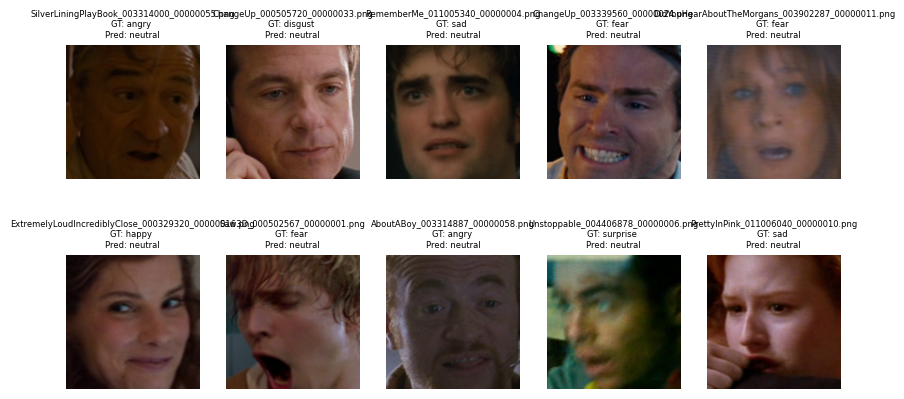

EPOCH: 2  of  150
epoch = 2...in training function


Loss=1.3791097402572632 Accuracy=345/913(37.79%) Epoch Avg loss=0.11076809 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.00it/s]


Test / Val: Average loss: 0.1135, Accuracy: 137/419 (32.70%)

last correct =137 | best correct = 148
EPOCH: 3  of  150
epoch = 3...in training function


Loss=1.3076812028884888 Accuracy=385/913(42.17%) Epoch Avg loss=0.09948518 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.06it/s]


Test / Val: Average loss: 0.1152, Accuracy: 185/419 (44.15%)

last correct =185 | best correct = 148
Updated the best model with correct: 185

EPOCH: 4  of  150
epoch = 4...in training function


Loss=0.055107224732637405 Accuracy=481/913(52.68%) Epoch Avg loss=0.08648661 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1795, Accuracy: 181/419 (43.20%)

last correct =181 | best correct = 185
EPOCH: 5  of  150
epoch = 5...in training function


Loss=0.5379126071929932 Accuracy=487/913(53.34%) Epoch Avg loss=0.08412108 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.09it/s]


Test / Val: Average loss: 0.1258, Accuracy: 212/419 (50.60%)

last correct =212 | best correct = 185
Updated the best model with correct: 212

EPOCH: 6  of  150
epoch = 6...in training function


Loss=5.368929386138916 Accuracy=521/913(57.06%) Epoch Avg loss=0.08593236 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1092, Accuracy: 221/419 (52.74%)

last correct =221 | best correct = 212
Updated the best model with correct: 221

EPOCH: 7  of  150
epoch = 7...in training function


Loss=0.6943582892417908 Accuracy=561/913(61.45%) Epoch Avg loss=0.07432265 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.12it/s]


Test / Val: Average loss: 0.1177, Accuracy: 182/419 (43.44%)

last correct =182 | best correct = 221
EPOCH: 8  of  150
epoch = 8...in training function


Loss=1.03915536403656 Accuracy=580/913(63.53%) Epoch Avg loss=0.06841122 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.09it/s]


Test / Val: Average loss: 0.1241, Accuracy: 218/419 (52.03%)

last correct =218 | best correct = 221
EPOCH: 9  of  150
epoch = 9...in training function


Loss=0.5813921689987183 Accuracy=621/913(68.02%) Epoch Avg loss=0.06268756 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.10it/s]


Test / Val: Average loss: 0.1479, Accuracy: 195/419 (46.54%)

last correct =195 | best correct = 221
EPOCH: 10  of  150
epoch = 10...in training function


Loss=0.7736579179763794 Accuracy=612/913(67.03%) Epoch Avg loss=0.06023256 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.09it/s]


Test / Val: Average loss: 0.1313, Accuracy: 192/419 (45.82%)

last correct =192 | best correct = 221
EPOCH: 11  of  150
epoch = 11...in training function


Loss=1.2686759233474731 Accuracy=612/913(67.03%) Epoch Avg loss=0.06071480 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.09it/s]


Test / Val: Average loss: 0.1174, Accuracy: 186/419 (44.39%)

last correct =186 | best correct = 221


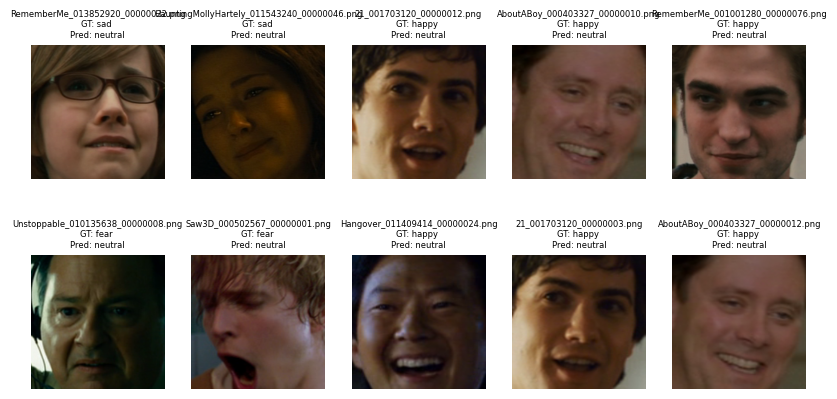

EPOCH: 12  of  150
epoch = 12...in training function


Loss=1.7413504123687744 Accuracy=614/913(67.25%) Epoch Avg loss=0.06079623 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.06it/s]


Test / Val: Average loss: 0.1284, Accuracy: 206/419 (49.16%)

last correct =206 | best correct = 221
EPOCH: 13  of  150
epoch = 13...in training function


Loss=0.033155202865600586 Accuracy=687/913(75.25%) Epoch Avg loss=0.04711932 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.09it/s]


Test / Val: Average loss: 0.1171, Accuracy: 200/419 (47.73%)

last correct =200 | best correct = 221
EPOCH: 14  of  150
epoch = 14...in training function


Loss=0.34389182925224304 Accuracy=703/913(77.00%) Epoch Avg loss=0.04468773 LR=0.001000: 100%|██████████| 58/58 [00:09<00:00,  6.09it/s]


Test / Val: Average loss: 0.1633, Accuracy: 148/419 (35.32%)

last correct =148 | best correct = 221
EPOCH: 15  of  150
epoch = 15...in training function


Loss=0.05869627371430397 Accuracy=721/913(78.97%) Epoch Avg loss=0.03642279 LR=0.000200: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1502, Accuracy: 207/419 (49.40%)

last correct =207 | best correct = 221
EPOCH: 16  of  150
epoch = 16...in training function


Loss=0.02159135229885578 Accuracy=784/913(85.87%) Epoch Avg loss=0.02892513 LR=0.000200: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1507, Accuracy: 203/419 (48.45%)

last correct =203 | best correct = 221
EPOCH: 17  of  150
epoch = 17...in training function


Loss=0.0027375086210668087 Accuracy=780/913(85.43%) Epoch Avg loss=0.02688940 LR=0.000200: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1420, Accuracy: 223/419 (53.22%)

last correct =223 | best correct = 221
Updated the best model with correct: 223

EPOCH: 18  of  150
epoch = 18...in training function


Loss=0.017043275758624077 Accuracy=800/913(87.62%) Epoch Avg loss=0.02199387 LR=0.000200: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1639, Accuracy: 205/419 (48.93%)

last correct =205 | best correct = 223
EPOCH: 19  of  150
epoch = 19...in training function


Loss=0.005365516059100628 Accuracy=804/913(88.06%) Epoch Avg loss=0.02225799 LR=0.000200: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1608, Accuracy: 209/419 (49.88%)

last correct =209 | best correct = 223
EPOCH: 20  of  150
epoch = 20...in training function


Loss=0.000576941529288888 Accuracy=818/913(89.59%) Epoch Avg loss=0.01903320 LR=0.000200: 100%|██████████| 58/58 [00:09<00:00,  6.09it/s]


Test / Val: Average loss: 0.1590, Accuracy: 208/419 (49.64%)

last correct =208 | best correct = 223
EPOCH: 21  of  150
epoch = 21...in training function


Loss=0.005454492289572954 Accuracy=817/913(89.49%) Epoch Avg loss=0.01906226 LR=0.000200: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1745, Accuracy: 188/419 (44.87%)

last correct =188 | best correct = 223


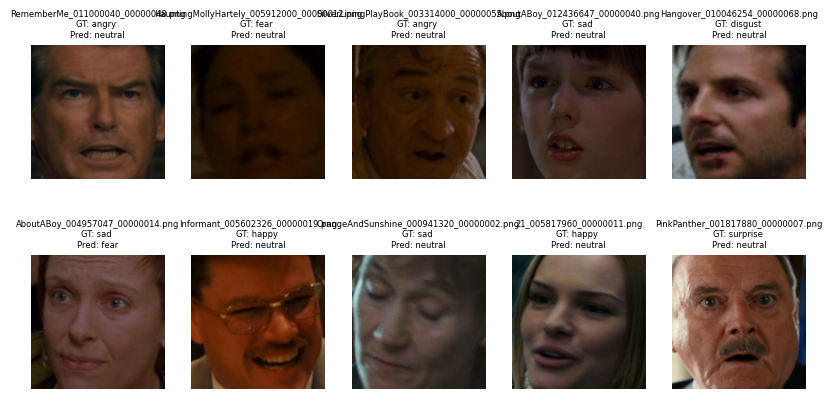

EPOCH: 22  of  150
epoch = 22...in training function


Loss=0.3317689001560211 Accuracy=817/913(89.49%) Epoch Avg loss=0.02109178 LR=0.000200: 100%|██████████| 58/58 [00:09<00:00,  6.07it/s]


Test / Val: Average loss: 0.1616, Accuracy: 206/419 (49.16%)

last correct =206 | best correct = 223
EPOCH: 23  of  150
epoch = 23...in training function


Loss=9.426847100257874e-05 Accuracy=819/913(89.70%) Epoch Avg loss=0.01744085 LR=0.000200: 100%|██████████| 58/58 [00:09<00:00,  6.09it/s]


Test / Val: Average loss: 0.1716, Accuracy: 208/419 (49.64%)

last correct =208 | best correct = 223
EPOCH: 24  of  150
epoch = 24...in training function


Loss=1.4379915000972687e-06 Accuracy=828/913(90.69%) Epoch Avg loss=0.01463900 LR=0.000040: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1777, Accuracy: 208/419 (49.64%)

last correct =208 | best correct = 223
EPOCH: 25  of  150
epoch = 25...in training function


Loss=7.973481501721835e-07 Accuracy=829/913(90.80%) Epoch Avg loss=0.01579516 LR=0.000040: 100%|██████████| 58/58 [00:09<00:00,  6.10it/s]


Test / Val: Average loss: 0.1736, Accuracy: 202/419 (48.21%)

last correct =202 | best correct = 223
EPOCH: 26  of  150
epoch = 26...in training function


Loss=0.005911264102905989 Accuracy=835/913(91.46%) Epoch Avg loss=0.01530543 LR=0.000040: 100%|██████████| 58/58 [00:09<00:00,  6.09it/s]


Test / Val: Average loss: 0.1726, Accuracy: 208/419 (49.64%)

last correct =208 | best correct = 223
EPOCH: 27  of  150
epoch = 27...in training function


Loss=3.396618922124617e-05 Accuracy=852/913(93.32%) Epoch Avg loss=0.01193079 LR=0.000040: 100%|██████████| 58/58 [00:09<00:00,  6.07it/s]


Test / Val: Average loss: 0.1915, Accuracy: 209/419 (49.88%)

last correct =209 | best correct = 223
EPOCH: 28  of  150
epoch = 28...in training function


Loss=2.3617633360117907e-06 Accuracy=851/913(93.21%) Epoch Avg loss=0.01427150 LR=0.000040: 100%|██████████| 58/58 [00:09<00:00,  6.11it/s]


Test / Val: Average loss: 0.1823, Accuracy: 208/419 (49.64%)

last correct =208 | best correct = 223
EPOCH: 29  of  150
epoch = 29...in training function


Loss=0.30917230248451233 Accuracy=844/913(92.44%) Epoch Avg loss=0.01644933 LR=0.000040: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1741, Accuracy: 209/419 (49.88%)

last correct =209 | best correct = 223
EPOCH: 30  of  150
epoch = 30...in training function


Loss=4.195568180875853e-06 Accuracy=838/913(91.79%) Epoch Avg loss=0.01508530 LR=0.000040: 100%|██████████| 58/58 [00:09<00:00,  6.10it/s]


Test / Val: Average loss: 0.1752, Accuracy: 208/419 (49.64%)

last correct =208 | best correct = 223
EPOCH: 31  of  150
epoch = 31...in training function


Loss=0.03429657220840454 Accuracy=837/913(91.68%) Epoch Avg loss=0.01373594 LR=0.000040: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1852, Accuracy: 205/419 (48.93%)

last correct =205 | best correct = 223


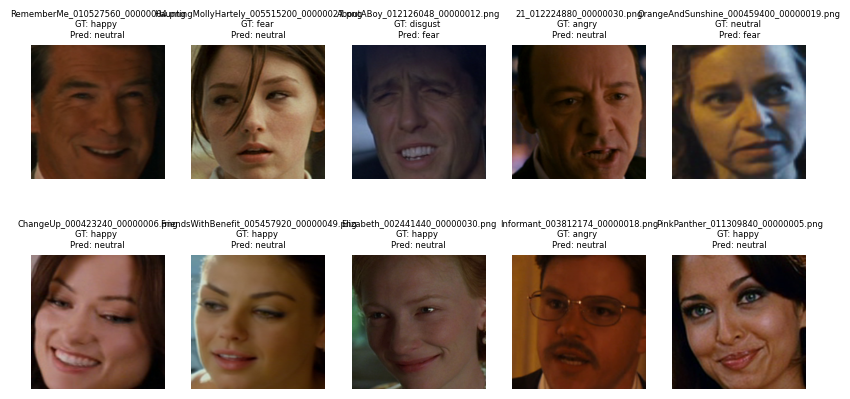

EPOCH: 32  of  150
epoch = 32...in training function


Loss=0.029109634459018707 Accuracy=844/913(92.44%) Epoch Avg loss=0.01516219 LR=0.000040: 100%|██████████| 58/58 [00:09<00:00,  6.05it/s]


Test / Val: Average loss: 0.1762, Accuracy: 206/419 (49.16%)

last correct =206 | best correct = 223
EPOCH: 33  of  150
epoch = 33...in training function


Loss=0.000753131986130029 Accuracy=848/913(92.88%) Epoch Avg loss=0.01271257 LR=0.000008: 100%|██████████| 58/58 [00:09<00:00,  6.10it/s]


Test / Val: Average loss: 0.1839, Accuracy: 204/419 (48.69%)

last correct =204 | best correct = 223
EPOCH: 34  of  150
epoch = 34...in training function


Loss=0.2597084641456604 Accuracy=850/913(93.10%) Epoch Avg loss=0.01355078 LR=0.000008: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1807, Accuracy: 205/419 (48.93%)

last correct =205 | best correct = 223
EPOCH: 35  of  150
epoch = 35...in training function


Loss=0.0034801664296537638 Accuracy=844/913(92.44%) Epoch Avg loss=0.01325981 LR=0.000008: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1909, Accuracy: 208/419 (49.64%)

last correct =208 | best correct = 223
EPOCH: 36  of  150
epoch = 36...in training function


Loss=0.02025619149208069 Accuracy=853/913(93.43%) Epoch Avg loss=0.01221451 LR=0.000008: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1788, Accuracy: 207/419 (49.40%)

last correct =207 | best correct = 223
EPOCH: 37  of  150
epoch = 37...in training function


Loss=0.005812696181237698 Accuracy=846/913(92.66%) Epoch Avg loss=0.01221008 LR=0.000008: 100%|██████████| 58/58 [00:09<00:00,  5.87it/s]


Test / Val: Average loss: 0.1880, Accuracy: 208/419 (49.64%)

last correct =208 | best correct = 223
EPOCH: 38  of  150
epoch = 38...in training function


Loss=0.19053003191947937 Accuracy=849/913(92.99%) Epoch Avg loss=0.01345425 LR=0.000008: 100%|██████████| 58/58 [00:09<00:00,  6.09it/s]


Test / Val: Average loss: 0.1843, Accuracy: 207/419 (49.40%)

last correct =207 | best correct = 223
EPOCH: 39  of  150
epoch = 39...in training function


Loss=0.03128955885767937 Accuracy=844/913(92.44%) Epoch Avg loss=0.01462871 LR=0.000008: 100%|██████████| 58/58 [00:09<00:00,  6.09it/s]


Test / Val: Average loss: 0.1882, Accuracy: 207/419 (49.40%)

last correct =207 | best correct = 223
EPOCH: 40  of  150
epoch = 40...in training function


Loss=0.019657162949442863 Accuracy=855/913(93.65%) Epoch Avg loss=0.01220499 LR=0.000008: 100%|██████████| 58/58 [00:09<00:00,  6.07it/s]


Test / Val: Average loss: 0.1809, Accuracy: 207/419 (49.40%)

last correct =207 | best correct = 223
EPOCH: 41  of  150
epoch = 41...in training function


Loss=0.021687747910618782 Accuracy=843/913(92.33%) Epoch Avg loss=0.01429732 LR=0.000008: 100%|██████████| 58/58 [00:09<00:00,  6.08it/s]


Test / Val: Average loss: 0.1812, Accuracy: 208/419 (49.64%)

last correct =208 | best correct = 223


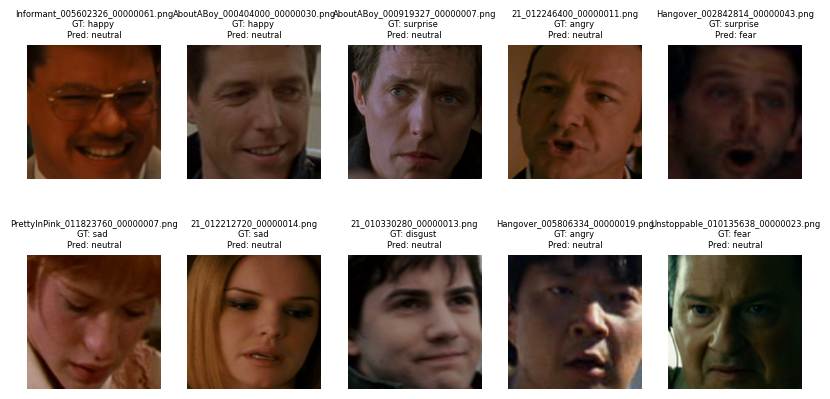

EPOCH: 42  of  150
epoch = 42...in training function


Loss=1.1477292776107788 Accuracy=853/913(93.43%) Epoch Avg loss=0.01463441 LR=0.000002: 100%|██████████| 58/58 [00:09<00:00,  6.10it/s]


Test / Val: Average loss: 0.1808, Accuracy: 208/419 (49.64%)

last correct =208 | best correct = 223
-------Early Stopping at epoch 42---
Best model loaded
Validation results with sfew
Test / Val: Average loss: 0.1422, Accuracy: 223/419 (53.22%)



In [57]:
# Training block
print('------ Training started for Non DANN Model ---- ')
print(f'starting LR : {lr}')
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, " of ", EPOCHS)

    #Train Model
    avg_epoch_loss, curr_lr = train_model_local_lr (model = model,
                                          device = device,
                                          data_loader = data_loader['source']['train'],
                                          optimizer = optimizer,
                                          epoch = epoch,
                                          class_loss_function = criterion_class)
    train_losses.append(avg_epoch_loss)
    lr_schedule.append(curr_lr)

    #Validate Model
    correct, avg_epoch_val_loss = test_model_local(model= model,
                                    device= device,
                                    data_loader = data_loader['source']['val'],
                                    class_loss_function = criterion_class
                                    )

    val_losses.append(avg_epoch_val_loss)
    list_val_correct.append(correct)

    #Adding Scheduler #TODO: ADD SCHEDULER
    scheduler.step(correct) #applying scheduler on accuracy proxy, i.e. correct

    # # Check if the current model has the best validation loss
    # print(f'Last Epoch Val Loss = {avg_epoch_val_loss} | Best Val Loss = {best_val_loss}' )
    # if avg_epoch_val_loss < best_val_loss:
    #   best_val_loss = avg_epoch_val_loss
    #   # save the current model state as the best model state
    #   best_model_state = deepcopy(non_dann_model.state_dict())
    #   print(f'Updated the best model with validation loss: {best_val_loss}\n')

    # check if the current model has the best accuracy
    print (f'last correct ={correct} | best correct = {best_val_acc}')
    if correct > best_val_acc:
      best_val_acc = correct
      # save the current model state as the best model state
      best_model_state = deepcopy(model.state_dict())
      print(f'Updated the best model with correct: {correct}\n')

    list_best_val_correct.append(best_val_acc)

    # early stopping
    # if early_stopping_difference(val_losses,
    #                              patience = early_stop_patience,
    #                              difference= early_stop_difference):
    #   print (f'-------Early Stopping at epoch {epoch+1}---')
    #   epoch_converge = epoch+1
    #   break

    if early_stopping_difference(list_val_correct,
                                 patience = early_stop_patience,
                                 difference= early_stop_difference):
      print (f'-------Early Stopping at epoch {epoch+1}---')
      epoch_converge = epoch+1
      break

    if early_stopping_difference(list_best_val_correct,
                                 patience = 2*early_stop_patience,
                                 difference= 0):
      print (f'-------Early Stopping at epoch {epoch+1}---')
      epoch_converge = epoch+1
      break



    ## showing misclassification images after every 10 epochs
    if epoch % 10 == 0:
      list_misclassified_images = get_misclassified_images_list(model= model,
                                                                device = device,
                                                                test_loader = data_loader['source']['val'],
                                                                num_image = 10)
      plot_misclassified_images(list_misclassified_images)

## using params of best model to update model
if best_model_state: # only update if best model has been saved, else the last one would be picked up
  # best_non_dann_model.load_state_dict(best_model_state)
  best_model.load_state_dict(best_model_state)
  print('Best model loaded')


print(f'Validation results with {source_name}')

correct, test_loss_source = test_model_local(model= best_model, #best_non_dann_model, #non_dann_model,
                                    device= device,
                                    data_loader = data_loader['source']['val'], # source val loader
                                    class_loss_function = criterion_class)


dict_non_dann_losses = {'train_losses' : train_losses,
                                       'val_losses': val_losses,
                                       'test_loss_source' : test_loss_source,
                                      #  'test_loss_target' : test_loss_target,
                                       'epoch_convergence' : epoch_converge,
                                       'lr': lr_schedule}


### Validation on Test Dataset - only when data loader is avaialable



In [39]:
# test_model_local(model= best_model,
#                             device= device,
#                             data_loader = data_loader['target']['val'], # target val loader
#                             class_loss_function = runconfig.criterion_class)

### `Model Performance Metrics`

In [58]:
true_labels, predicted_labels, accuracy, precision, conf_matrix, class_report = performance_metric(model= best_model,
                                                                                                   device= device,
                                                                                                   data_loader = data_loader['source']['val'], # source val loader
                                                                                                   )

Accuracy: 0.5322195704057279
Precision: 0.5400259764225273
Confusion Matrix:
[[35 15  1  5  8  9  2]
 [ 1  6  0  4  3  4  4]
 [ 9  2  7  4  9  8  4]
 [ 0  2  0 63  0  5  2]
 [13  1  1  4 25  6  2]
 [ 2  5  4  4 11 54  4]
 [ 3  5  4  7 10  9 33]]
          Angry  Disgust  Fear  Happy  Sad  Surprise  Neutral
Angry        35       15     1      5    8         9        2
Disgust       1        6     0      4    3         4        4
Fear          9        2     7      4    9         8        4
Happy         0        2     0     63    0         5        2
Sad          13        1     1      4   25         6        2
Surprise      2        5     4      4   11        54        4
Neutral       3        5     4      7   10         9       33
Classification Report:
              precision    recall  f1-score   support

       Angry       0.56      0.47      0.51        75
     Disgust       0.17      0.27      0.21        22
        Fear       0.41      0.16      0.23        43
       Happy      

### Saving Non-Dann Model

In [59]:
target_name = 'expw'
MODEL_DIR = dataconfig.MODEL_DIR
NON_DANN_SFEW_DIR = dataconfig.NON_DANN_SFEW_DIR
SPECIFIC_MODEL_DIR = Path(os.path.join(MODEL_DIR, f'non_dann_{source_name}_{target_name}'))
print(MODEL_DIR, NON_DANN_SFEW_DIR, SPECIFIC_MODEL_DIR)

/content/gdrive/MyDrive/CV_FER/models /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew_expw


In [60]:
model_name = f'non_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}_se_a.pt' #"non_dann_sfew_" +str(time.strftime("%d_%m"))+ ".pt"
print("\nDO VERIFY THE MODEL NAME BEFORE MOVING AHEAD: ", model_name)


DO VERIFY THE MODEL NAME BEFORE MOVING AHEAD:  non_dann_sfew_expw_24_05_se_a.pt


In [61]:
# model_name = f'non_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}_{se}.pt' #"non_dann_sfew_" +str(time.strftime("%d_%m"))+ ".pt"
# dataconfig = DataConfig()
# NON_DANN_SFEW_DIR = dataconfig.NON_DANN_SFEW_DIR
if not SPECIFIC_MODEL_DIR.exists():
    # Create the directory
    SPECIFIC_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {SPECIFIC_MODEL_DIR} created successfully.')
else:
    print(f'Directory {SPECIFIC_MODEL_DIR} already exists.')

torch.save(best_model.state_dict(), Path(SPECIFIC_MODEL_DIR,model_name))

Directory /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew_expw already exists.


In [62]:
model_name

'non_dann_sfew_expw_24_05_se_a.pt'

## Dataset - Target

- EXPW dataset

In [63]:
# checking the mounted drive and mounting if not done
import os
if not os.path.exists('/content/gdrive'):
  from google.colab import drive
  drive.mount('/content/gdrive')
else:
    print("Google Drive is already mounted.")


Google Drive is already mounted.


### Creating Dataloader for EXPW

In [64]:
# from da_cv_fer.ds_expw_crop_race import EXPWCROPRACE
from da_cv_fer.ds_expw_crop_image_race import EXPWIMAGECROPRACE


expw_obj = EXPWIMAGECROPRACE(type = None, crop_at_runtime=False)

expw_train_ds, expw_val_ds = expw_obj.get_dataset()
expw_train_loader, expw_val_loader = expw_obj.get_dataloader()
print(f' length of EXPW dataset : {len(expw_train_loader.dataset)} , {len(expw_train_ds)}')

desitination file path = dataset/expwds/expwds.zip
Directory dataset/expwds created successfully.
Dataset URL: https://www.kaggle.com/datasets/mohammedaaltaha/expwds


100%|██████████| 7.68G/7.68G [07:38<00:00, 18.0MB/s]



File downloaded successfully from https://www.kaggle.com/datasets/mohammedaaltaha/expwds to dataset/expwds/expwds.zip
Unzipped Files already exist in dataset/expwds, not extracted
---NOT CROPPING AT RUNTIME --
 before splitting : image_label_dict 68096
*** Starting creation of dataset based on RACE data ***
pickle_raceds_crop_list_path:  /content/gdrive/MyDrive/CV_FER/dataset/expw_raceds_crop_image_dict.pkl
train list [('amazed_old_72.jpg', 3), ('awe_African_435.jpg', 3)] <class 'list'> 2000
size of dataset (list_img_label): 2000
*** Completed creation of dataset based on RACE data ***
---NOT CROPPING AT RUNTIME--, flag_create_crop_contents value: False
Directory created: dataset/expwds/cropped
**** dataset/expwds/cropped is empty***

 
39 were not able to crop
1961 cropped images created in cropped
---NOT CROPPING AT RUNTIME --
*** Starting creation of dataset based on RACE data ***
pickle_raceds_crop_list_path:  /content/gdrive/MyDrive/CV_FER/dataset/expw_raceds_crop_image_dict.pkl


In [ ]:
# {0:"Angry",
#             1:"Disgust",
#             2:"Fear",
#             3:"Happy",
#             4:"Sad",
#             5:"Surprise",
#             6:"Neutral"}

# ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]

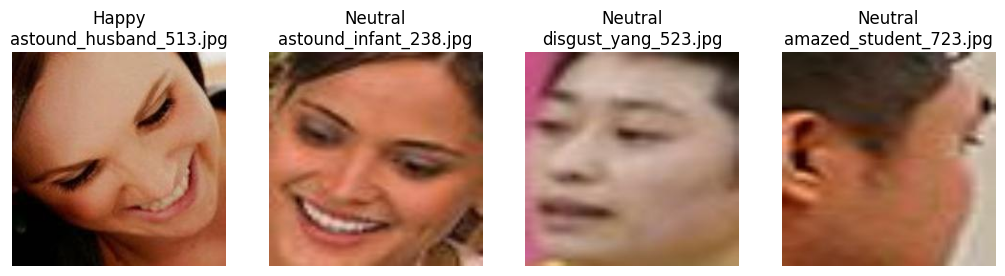

In [69]:
show_batch(expw_train_loader,["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"],4, normalized = False)

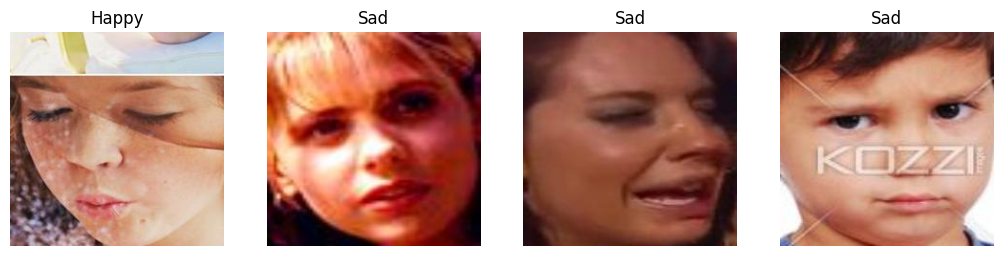

In [70]:
show_batch(expw_val_loader,["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"],4, normalized = False)

In [71]:
if expw_train_loader is None:
  sfew_loader = {'name': 'sfew',
               'train':sfew_train_loader,
               'val':sfew_val_loader
               }
  data_loader = {'source' : sfew_loader}
  source_name = data_loader['source']['name']
  target_name = "expw"
else:
  sfew_loader = {'name': 'sfew',
                'train':sfew_train_loader,
                'val':sfew_val_loader
                }

  expw_loader = {'name': 'expw',
                'train':expw_train_loader,
                'val':expw_val_loader
                }

  data_loader = {'source' : sfew_loader,
                'target' : expw_loader}

  source_name = data_loader['source']['name']
  target_name = data_loader['target']['name']

### Validation of non dann on Test Dataset - only when data loader is avaialable


In [75]:
test_model_local(model= best_model.to(device),
                            device= device,
                            data_loader = data_loader['target']['val'], # target val loader
                            class_loss_function = nn.CrossEntropyLoss(weight = class_weights).to(device=device))

Test / Val: Average loss: 0.2903, Accuracy: 2608/8458 (30.83%)



(2608, 0.29030999309432004)

In [44]:
torch.cuda.empty_cache()

## Loading NON DANN Model for DANN and DANN EWC


In [76]:
# source_name = "sfew"
# target_name = "expw"
today_model_name = f'non_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}_se_a.pt' # Typical - non_dann_sfew_expw_30_01.pt This may change, use specific model name if required4
print(f'today_model_name {today_model_name}')
# custom_model_name= 'non_dann_sfew_expw_08_04.pt'
# print(f'custom_model_name {custom_model_name}')

model_name = today_model_name

print("\n****model name that would be used for loading: ", model_name)

today_model_name non_dann_sfew_expw_24_05_se_a.pt

****model name that would be used for loading:  non_dann_sfew_expw_24_05_se_a.pt


### Loading Structure of Models

In [77]:
if not device:
  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  print(device)

In [78]:
# from data_config import DataConfig
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR

MODEL_PATH = Path(os.path.join(MODEL_DIR, f'non_dann_{source_name}_{target_name}', model_name))

In [79]:
model_dann =  DANN_VGG_SE(model_pretrained = model_pretrained, num_classes=7)  # skeleton copy

model_dann.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device(device)))

<All keys matched successfully>

In [80]:
model_dann_ewc = deepcopy(model_dann) # saves training time - check with all

In [ ]:
# model_dann_ewc_2 =  DANN_VGG(model_pretrained = model_pretrained, num_classes=7)  # skeleton copy

# model_dann_ewc_2.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device(device)))


<All keys matched successfully>

In [81]:
model_dann

DANN_VGG_SE(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(2

In [82]:
params = {name: param for name, param in model_dann.named_parameters() if param.requires_grad}
params.keys()

dict_keys(['feature_extractor.0.weight', 'feature_extractor.0.bias', 'feature_extractor.2.weight', 'feature_extractor.2.bias', 'feature_extractor.5.weight', 'feature_extractor.5.bias', 'feature_extractor.7.weight', 'feature_extractor.7.bias', 'feature_extractor.10.weight', 'feature_extractor.10.bias', 'feature_extractor.12.weight', 'feature_extractor.12.bias', 'feature_extractor.14.weight', 'feature_extractor.14.bias', 'feature_extractor.17.weight', 'feature_extractor.17.bias', 'feature_extractor.19.weight', 'feature_extractor.19.bias', 'feature_extractor.21.weight', 'feature_extractor.21.bias', 'feature_extractor.24.weight', 'feature_extractor.24.bias', 'feature_extractor.26.weight', 'feature_extractor.26.bias', 'feature_extractor.28.weight', 'feature_extractor.28.bias', 'feature_extractor.31.fc.0.weight', 'feature_extractor.31.fc.0.bias', 'feature_extractor.31.fc.2.weight', 'feature_extractor.31.fc.2.bias', 'feature_extractor.32.weight', 'feature_extractor.32.bias', 'class_classifier

## Test Function

In [83]:
def get_correct_preds(prediction, labels):
    """
    Function to return total number of correct predictions
    :param prediction: Model predictions on a given sample of data
    :param labels: Correct labels of a given sample of data
    :return: Number of correct predictions
    """
    return prediction.argmax(dim=1).eq(labels.argmax(dim=1)).sum().item()

def test_model_local(model, device, data_loader, mode= 'test',
               class_loss_function = nn.CrossEntropyLoss() ):
    model = model.to(device)
    model.eval() # evaluation mode

    # variables to track loss and accuracy
    test_loss = 0.0
    correct = 0

    # Disable gradient updation
    with torch.no_grad():
        # Iterate over each batch and fetch images and labels from the batch
        for batch_idx, batch in enumerate(data_loader):
            images, labels = batch[0].to(device), batch[1].to(device)

            class_output,_,_  = model((images*255)) # forward pass, output = {class}
            class_loss = class_loss_function(class_output,labels) # Calculate Loss

            test_loss += class_loss.item() # sum up batch loss

            # Sum up batch correct predictions
            correct += get_correct_preds(class_output, labels)

    # Calculate test loss for a epoch
    test_loss /= len(data_loader.dataset)

    print('Test / Val: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(test_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))


    return correct, test_loss

## DANN Execution: Training, Validating, Saving

### DANN Execution Function

In [84]:
def execute_dann(model,
                 device,
                 source_train_loader, source_val_loader,
                 target_train_loader, target_val_loader,
                 optimizer,
                 n_epochs, # total number of epochs (different from individual epoch)
                 class_loss_function = nn.CrossEntropyLoss(),
                 domain_loss_function = nn.BCEWithLogitsLoss(),
                 scheduler = None,
                 early_stop_patience = None,
                 early_stop_difference = None
                 ):

    train_losses = [] # to capture train losses over training epochs
    val_losses = [] # to capture validation loss over epochs
    list_lr =[] # to capture lr over epochs
    list_val_correct = [] # to capture validation accuracy over epochs
    list_best_val_correct = [] # to capture best validtion accuracy over epochs


    epoch_converge = 0
    max_batches = min(len(source_train_loader), len(target_train_loader)) # Trying to check which is having less batches.
    model = model.to(device)

    # model.apply(weights_init) # TODO: skipping weights update - we can experimentation later on, and see if this helps
    list_alpha =[]


    # for best model
    best_model = deepcopy(model).to(device) # for best model
    best_val_loss = float('inf') # Initialize variables to track the best validation loss
    best_val_acc = 0 # Initialize variable to track best accuracy
    best_model_state = None # Initialize variables to track the best model state


    for epoch_idx in range(n_epochs):
        print(f'epoch = {epoch_idx+1}...in DANN execution function')
        source_iterator = iter(source_train_loader)
        target_iterator = iter (target_train_loader)
        epoch_task_loss = 0
        epoch_domain_loss =  0
        epoch_total_loss = 0
        processed = 0

        for batch_idx in range(max_batches-1):
            # p = float(batch_idx + epoch_idx * max_batches) / (n_epochs * max_batches)
            # alpha = 2. / (1. + np.exp(-10 * p)) - 1
            alpha = 1.0
            list_alpha.append(alpha)
            alpha = torch.tensor(alpha)

            model.train() # everytime ?
            optimizer.zero_grad() # flushing out the accumulated gradients

            #---------------------Source Dataset Training ------------------------#
            source_batch = next(source_iterator)
            source_batch[0] = source_batch[0] * 255.0  # Convert inputs from [0, 1] to [0, 255]

            source_images, source_labels = source_batch[0].to(device), source_batch[1].to(device) # getting images and labels, on device
            source_class_outputs, source_domain_outputs, _ = model(source_images, alpha=alpha) # forward pass, output = {class, domain, feature}


            loss_source_class = class_loss_function(source_class_outputs, source_labels) # calculating class loss

            source_domain_inputs = torch.tensor([1., 0.]*len(source_batch[0])).view(-1,2).to(device) # Source Image == [1., 0.]

            loss_source_domain = domain_loss_function(source_domain_outputs, source_domain_inputs) # calculating domain loss

            processed += len(source_batch[0])

            #---------------------Target Dataset Training ------------------------#
            target_batch = next (target_iterator)
            target_batch[0] = target_batch[0] * 255.0  # Convert inputs from [0, 1] to [0, 255]
            target_images = target_batch[0].to(device) # getting images, on device. There are no labels for target
            _, target_domain_outputs, _ = model(target_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            target_domain_inputs = torch.tensor([0., 1.]*len(source_batch[0])).view(-1,2).to(device)  # Target Image == [0., 1.]
            # print(f' target domain input shape {target_domain_inputs.shape}, output shape {target_domain_outputs.shape}')

            loss_target_domain = domain_loss_function(target_domain_outputs,target_domain_inputs)  # calculating domain loss


            #---------------------Combining Loss ------------------------#
            total_loss = loss_source_class + (loss_source_domain + loss_target_domain) # changed the loss
            total_loss.backward() #backpropogation, creating gradients
            optimizer.step() # updating the params

            epoch_task_loss += loss_source_class.item()
            epoch_domain_loss += loss_source_domain.item() + loss_target_domain.item()
            epoch_total_loss += total_loss.item()

            curr_lr = optimizer.param_groups[0]['lr'] # current learning rate
            list_lr.append(curr_lr)

            # after 10 batches
            if (batch_idx % 10 == 0):
                print("Epoch[{}/{}] Step[{}/{}]: loss_total={:.4f} / domain_loss_target={:.4f} / domain_loss_source={:.4f} / task_loss={:.4f} / domain_loss={:.4f} / alpha={:.2f} / lr={:.6f}"
              .format(epoch_idx + 1,
                      n_epochs,
                      batch_idx + 1,
                      max_batches,
                      total_loss.item(),
                      loss_target_domain.item()
                      ,loss_source_domain.item()
                      ,loss_source_class.item()
                      ,loss_source_domain.item()+loss_source_class.item(),
                      alpha,
                      curr_lr
                      ))
        # After every epoch
        avg_train_task_loss =  float("{:.6f}".format(epoch_task_loss/processed))
        train_losses.append(avg_train_task_loss)

        # #Scheduler
        # if scheduler:
        #   scheduler.step(avg_train_task_loss) ## applying scheduler on training loss

        #Validate Model after every epoch
        correct, avg_val_task_loss = test_model_local(model= model,
                                                device= device,
                                                data_loader = source_val_loader,
                                                class_loss_function = class_loss_function)
        val_losses.append(avg_val_task_loss)

        # # Check if the current model has the best validation loss
        # print(f'Last Epoch Val Loss = {avg_val_task_loss} | Best Val Loss = {best_val_loss}' )
        # if avg_val_task_loss < best_val_loss:
        #   best_val_loss = avg_val_task_loss
        #   # save the current model state as the best model state
        #   best_model_state = deepcopy(model.state_dict())
        #   print(f'Updated the best model with validation loss: {best_val_loss}\n')

        list_val_correct.append(correct)

        #Adding Scheduler #TODO: ADD SCHEDULER
        if scheduler:
          scheduler.step(correct) #applying scheduler on accuracy proxy, i.e. correct


        # check if the current model has the best accuracy
        print (f'last correct ={correct} | best correct = {best_val_acc}')
        if correct > best_val_acc:
          best_val_acc = correct
          # save the current model state as the best model state
          best_model_state = deepcopy(model.state_dict())
          print(f'Updated the best model with correct: {correct}\n')

        list_best_val_correct.append(best_val_acc) # appending the best one for early stopping



        #TODO: Early Stopping
        if early_stop_patience and early_stop_difference: # early stopping required
          if early_stopping_difference(list_val_correct,
                                       patience = early_stop_patience,
                                       difference= early_stop_difference):
            print (f'-------Early Stopping at epoch {epoch_idx+1}---')
            epoch_converge = epoch_idx+1
            break # break from epoch loop

        if early_stop_patience and early_stop_difference: # early stopping based on best accuracy
          if early_stopping_difference(val_losses,
                                       patience = 2*early_stop_patience,
                                       difference= 0):
            print (f'-------Early Stopping at epoch {epoch_idx+1}---')
            epoch_converge = epoch_idx+1
            break # break from epoch loop

            ## showing misclassification images after every 10 epochs
        if epoch_idx % 10 == 0:
          list_misclassified_images = get_misclassified_images_list(model= model,
                                                                    device = device,
                                                                    test_loader = source_val_loader,
                                                                    num_image = 10)
          plot_misclassified_images(list_misclassified_images)


    # Testing when the training is over - completed or early stopped
    ## using params of best model to update model
    if best_model_state: # only update if best model has been saved, else the last one would be picked up
      model.load_state_dict(best_model_state)
      print('Best model loaded')

    correct, test_loss_source = test_model_local(model= model,
                            device= device,
                            data_loader = source_val_loader, # source val loader
                            class_loss_function = class_loss_function)

    correct, test_loss_target = test_model_local(model= model,
                            device= device,
                            data_loader = target_val_loader, # target val loader
                            class_loss_function = class_loss_function)

    dict_dann_losses = {'train_losses' : train_losses,
                        'val_losses': val_losses,
                        'test_loss_source' : test_loss_source,
                        'test_loss_target' : test_loss_target,
                        'epoch_convergence' : epoch_converge,
                        'list_alpha' : list_alpha,
                        'lr':list_lr}

    print(f'alpha list \n {list_alpha}')
    return model, dict_dann_losses


### DANN Execution Config

In [85]:
runconfig = RunConfig()
lr_dann = runconfig.inital_lr
lr_dann = lr_dann
lr_dann = 0.001 # override
optimizer_dann = optim.SGD(model_dann.parameters(), lr = lr_dann, momentum = 0.9)
# n_epochs = runconfig.EPOCHS if int(dict_non_dann_losses['epoch_convergence']) == 0 else int(dict_non_dann_losses['epoch_convergence'])

# n_epochs =  3 # override
n_epochs = runconfig.EPOCHS

print("EPOCHS", n_epochs)


# # ReduceLRonPlateau Scheduler Params
# scheduler_patience = runconfig.scheduler_patience
# scheduler_factor = runconfig.scheduler_factor
# scheduler_threshold = runconfig.scheduler_threshold
# Early stopping params
# early_stop_patience = runconfig.early_stop_patience
# early_stop_difference = runconfig.early_stop_difference

# ReduceLRonPlateau Scheduler Params
scheduler_patience = 8 #runconfig.scheduler_patience
scheduler_factor = runconfig.scheduler_factor
scheduler_threshold = 25 #runconfig.scheduler_threshold

# Early stopping params
early_stop_patience = 15 #runconfig.early_stop_patience
early_stop_difference = 15 #runconfig.early_stop_difference


# Set up the ReduceLROnPlateau scheduler
# scheduler = ReduceLROnPlateau(optimizer_dann,
#                               mode='min',
#                               factor=scheduler_factor,
#                               patience=scheduler_patience,
#                               threshold = scheduler_threshold,
#                               min_lr=1e-6,
#                               verbose= True)

# Set up the ReduceLROnPlateau scheduler
scheduler = ReduceLROnPlateau(optimizer_dann,
                              # mode='min',
                              mode='max',
                              factor=scheduler_factor,
                              patience=scheduler_patience,
                              threshold = scheduler_threshold,
                              threshold_mode='abs',
                              min_lr=1e-6,
                              verbose= True)



EPOCHS 150


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


### DANN Execution

------------training started for DANN Model ------------------
epoch = 1...in DANN execution function
Epoch[1/150] Step[1/58]: loss_total=1.7962 / domain_loss_target=0.6540 / domain_loss_source=0.7321 / task_loss=0.4101 / domain_loss=1.1422 / alpha=1.00 / lr=0.001000
Epoch[1/150] Step[11/58]: loss_total=1.9551 / domain_loss_target=0.6347 / domain_loss_source=0.7644 / task_loss=0.5559 / domain_loss=1.3203 / alpha=1.00 / lr=0.001000
Epoch[1/150] Step[21/58]: loss_total=2.2294 / domain_loss_target=0.5937 / domain_loss_source=0.7319 / task_loss=0.9038 / domain_loss=1.6357 / alpha=1.00 / lr=0.001000
Epoch[1/150] Step[31/58]: loss_total=2.2538 / domain_loss_target=0.6210 / domain_loss_source=0.7206 / task_loss=0.9121 / domain_loss=1.6327 / alpha=1.00 / lr=0.001000
Epoch[1/150] Step[41/58]: loss_total=1.9851 / domain_loss_target=0.6332 / domain_loss_source=0.7030 / task_loss=0.6489 / domain_loss=1.3519 / alpha=1.00 / lr=0.001000
Epoch[1/150] Step[51/58]: loss_total=1.9336 / domain_loss_target

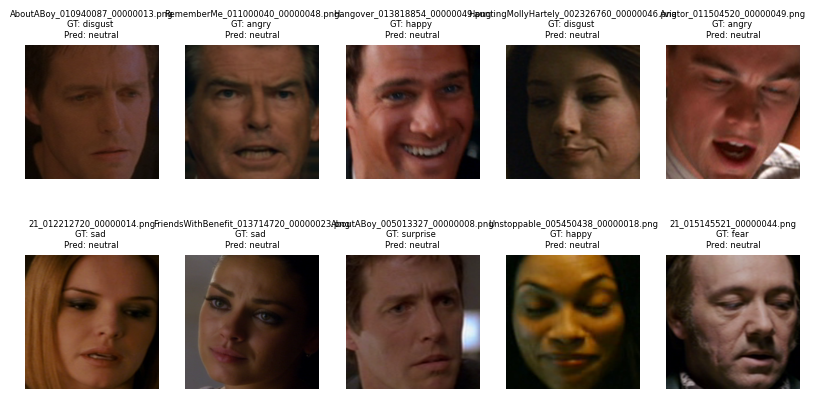

epoch = 2...in DANN execution function
Epoch[2/150] Step[1/58]: loss_total=1.5855 / domain_loss_target=0.6672 / domain_loss_source=0.7006 / task_loss=0.2177 / domain_loss=0.9183 / alpha=1.00 / lr=0.001000
Epoch[2/150] Step[11/58]: loss_total=1.7731 / domain_loss_target=0.5945 / domain_loss_source=0.7077 / task_loss=0.4710 / domain_loss=1.1787 / alpha=1.00 / lr=0.001000
Epoch[2/150] Step[21/58]: loss_total=1.9476 / domain_loss_target=0.5967 / domain_loss_source=0.7000 / task_loss=0.6509 / domain_loss=1.3509 / alpha=1.00 / lr=0.001000
Epoch[2/150] Step[31/58]: loss_total=1.9178 / domain_loss_target=0.6897 / domain_loss_source=0.6702 / task_loss=0.5579 / domain_loss=1.2281 / alpha=1.00 / lr=0.001000
Epoch[2/150] Step[41/58]: loss_total=2.2268 / domain_loss_target=0.7078 / domain_loss_source=0.6886 / task_loss=0.8305 / domain_loss=1.5191 / alpha=1.00 / lr=0.001000
Epoch[2/150] Step[51/58]: loss_total=1.9491 / domain_loss_target=0.6594 / domain_loss_source=0.6993 / task_loss=0.5904 / domain

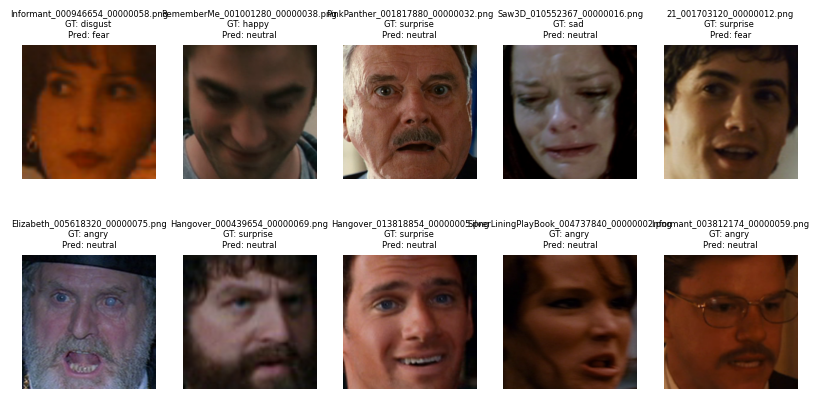

epoch = 12...in DANN execution function
Epoch[12/150] Step[1/58]: loss_total=1.8367 / domain_loss_target=0.6518 / domain_loss_source=0.7256 / task_loss=0.4593 / domain_loss=1.1849 / alpha=1.00 / lr=0.000200
Epoch[12/150] Step[11/58]: loss_total=1.8513 / domain_loss_target=0.5764 / domain_loss_source=0.7352 / task_loss=0.5397 / domain_loss=1.2749 / alpha=1.00 / lr=0.000200
Epoch[12/150] Step[21/58]: loss_total=1.5201 / domain_loss_target=0.6637 / domain_loss_source=0.7052 / task_loss=0.1512 / domain_loss=0.8564 / alpha=1.00 / lr=0.000200
Epoch[12/150] Step[31/58]: loss_total=1.6329 / domain_loss_target=0.6429 / domain_loss_source=0.8014 / task_loss=0.1886 / domain_loss=0.9900 / alpha=1.00 / lr=0.000200
Epoch[12/150] Step[41/58]: loss_total=1.5600 / domain_loss_target=0.6275 / domain_loss_source=0.6675 / task_loss=0.2650 / domain_loss=0.9325 / alpha=1.00 / lr=0.000200
Epoch[12/150] Step[51/58]: loss_total=1.5767 / domain_loss_target=0.5829 / domain_loss_source=0.6791 / task_loss=0.3147 /

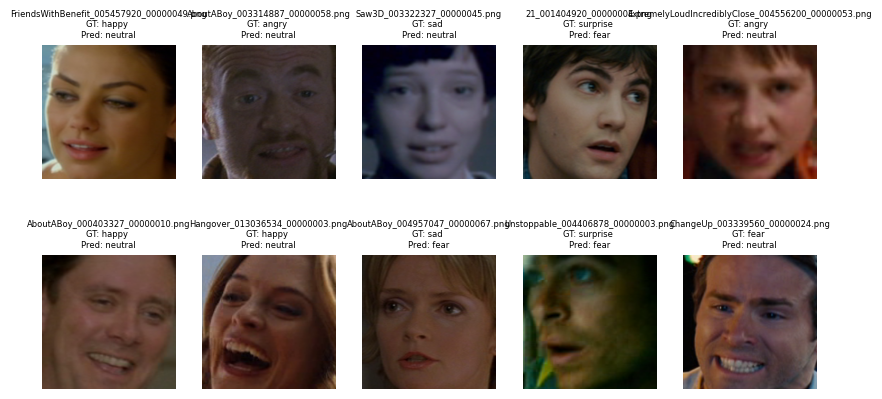

epoch = 22...in DANN execution function
Epoch[22/150] Step[1/58]: loss_total=1.4229 / domain_loss_target=0.7093 / domain_loss_source=0.6610 / task_loss=0.0526 / domain_loss=0.7136 / alpha=1.00 / lr=0.000040
Epoch[22/150] Step[11/58]: loss_total=1.3474 / domain_loss_target=0.6848 / domain_loss_source=0.6540 / task_loss=0.0086 / domain_loss=0.6625 / alpha=1.00 / lr=0.000040
Epoch[22/150] Step[21/58]: loss_total=1.5995 / domain_loss_target=0.6776 / domain_loss_source=0.6849 / task_loss=0.2370 / domain_loss=0.9220 / alpha=1.00 / lr=0.000040
Epoch[22/150] Step[31/58]: loss_total=1.3907 / domain_loss_target=0.7232 / domain_loss_source=0.6115 / task_loss=0.0561 / domain_loss=0.6676 / alpha=1.00 / lr=0.000040
Epoch[22/150] Step[41/58]: loss_total=1.4689 / domain_loss_target=0.6735 / domain_loss_source=0.6509 / task_loss=0.1445 / domain_loss=0.7954 / alpha=1.00 / lr=0.000040
Epoch[22/150] Step[51/58]: loss_total=1.4023 / domain_loss_target=0.6967 / domain_loss_source=0.6787 / task_loss=0.0268 /

In [86]:
print(f'------------training started for DANN Model ------------------')

dann_model_trained, dict_dann_losses = execute_dann(model=model_dann,
                                                    device=device,
                                                    source_train_loader = data_loader['source']['train'], #sfew_train_loader,
                                                    source_val_loader = data_loader['source']['val'], #sfew_val_loader,
                                                    target_train_loader = data_loader['target']['train'], #expw_train_loader,
                                                    target_val_loader = data_loader['target']['val'], #expw_val_loader,
                                                    optimizer = optimizer_dann,
                                                    n_epochs = n_epochs,
                                                    class_loss_function = nn.CrossEntropyLoss(weight = class_weights).to(device=device),
                                                    # class_loss_function = runconfig.criterion_class,
                                                    domain_loss_function = runconfig.criterion_domain,
                                                    scheduler = scheduler,
                                                    early_stop_patience = early_stop_patience,
                                                    early_stop_difference = early_stop_difference
                                                    )

### DANN Saving

In [87]:
dann_model_name = f'dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}_se_a.pt' # "dann_sfew_expw_" + str(time.strftime("%d_%m")) + ".pt"
print(dann_model_name)

# from data_config import DataConfig
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR

DANN_MODEL_DIR =  Path(os.path.join(MODEL_DIR, f'dann_{source_name}_{target_name}'))


if not DANN_MODEL_DIR.exists():
    # Create the directory
    DANN_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {DANN_MODEL_DIR} created successfully.')
else:
    print(f'Directory {DANN_MODEL_DIR} already exists.')


try:
    torch.save(dann_model_trained.state_dict(), Path(DANN_MODEL_DIR,dann_model_name))
    print(f'{dann_model_name} SAVED at {Path(DANN_MODEL_DIR,dann_model_name)}!')
except:
    print(f'Problem in saving {dann_model_name}, NOT SAVED!')

dann_sfew_expw_24_05_se_a.pt
Directory /content/gdrive/MyDrive/CV_FER/models/dann_sfew_expw already exists.
dann_sfew_expw_24_05_se_a.pt SAVED at /content/gdrive/MyDrive/CV_FER/models/dann_sfew_expw/dann_sfew_expw_24_05_se_a.pt!


### DANN Performance

In [92]:
true_labels, predicted_labels, accuracy, precision, conf_matrix, class_report = performance_metric(model= dann_model_trained,
                                                                                                   device= device,
                                                                                                   data_loader = data_loader['source']['val'], # source val loader
                                                                                                   )


Accuracy: 0.5322195704057279
Precision: 0.5132117050066557
Confusion Matrix:
[[49  6  3  3  7  7  0]
 [ 2  1  1  7  1  5  5]
 [11  2  8  0  9  6  7]
 [ 6  1  0 61  0  3  1]
 [12  0  4  2 24  6  4]
 [ 6  0  3  3 15 48  9]
 [ 3  2  6  7 11 10 32]]
          Angry  Disgust  Fear  Happy  Sad  Surprise  Neutral
Angry        49        6     3      3    7         7        0
Disgust       2        1     1      7    1         5        5
Fear         11        2     8      0    9         6        7
Happy         6        1     0     61    0         3        1
Sad          12        0     4      2   24         6        4
Surprise      6        0     3      3   15        48        9
Neutral       3        2     6      7   11        10       32
Classification Report:
              precision    recall  f1-score   support

       Angry       0.55      0.65      0.60        75
     Disgust       0.08      0.05      0.06        22
        Fear       0.32      0.19      0.24        43
       Happy      

In [ ]:
#@title Inferencing on Test Dataset
test_model_local(model= dann_model_trained,
                            device= device,
                            data_loader = data_loader['target']['val'], # target val loader
                            class_loss_function = nn.CrossEntropyLoss(weight = class_weights).to(device=device))
                            # class_loss_function = runconfig.criterion_class)

## EWC DANN Execution: Training, Validating, Saving


In [100]:
model_dann_ewc


DANN_VGG_SE(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(2

### EWC Code
- Regularization Penalty

In [101]:
from torch.autograd import Variable
from torch.autograd import Function
from da_cv_fer.run_config import RunConfig

runconfig = RunConfig()
def variable(t: torch.Tensor, use_cuda=True, **kwargs):
    if torch.cuda.is_available() and use_cuda:
        t = t.cuda()
    return Variable(t, **kwargs)

class EWC(object):
    def __init__(self, model: nn.Module,
                 data_loader: torch.utils.data.DataLoader
                #  dataset: list
                 ,device=device
                 , class_loss_function = runconfig.criterion_class):

        self.model = model.to(device)
        # print("----------MODEL--------\n",self.model)
        self.dataset = data_loader
        self.device = device
        self.class_loss_function = class_loss_function

        # creating dictionary of params which required grad
        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}

        self._means = {}
        # for n, p in deepcopy(self.params).items():
        for n, p in self.params.items():

            self._means[n] = variable(p.data)

        # print("--------self._means----------------\n", self._means)

        self._precision_matrices = self._diag_fisher()

    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items():
            p.data.zero_()
            precision_matrices[n] = variable(p.data)
        # print("--------PRECISION MATRICES----------------\n", precision_matrices)

        self.model.eval()
        for batch in self.dataset:
            self.model.zero_grad()
            batch[0] = batch[0]* 255.0
            images, labels  = variable(batch[0].to(device)), variable(batch[1].to(device))
            class_ouputs, _ , _ = self.model(images) # class_output, domain_output, features
            task_loss =  self.class_loss_function(class_ouputs,labels)
            task_loss.backward() # only calculating the gradients, not updating it
            # print("--------task loss----------------\n", task_loss)

            for n, p in self.model.named_parameters():
              # if type(p.grad)
              if isinstance(p.grad, type(None)):
                pass # parameter value would remain as it is
              else:
                # print(n,":", type(p.grad))
                precision_matrices[n].data += p.grad.data ** 2 / len(self.dataset)

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model: nn.Module):
        loss = 0
        for n, p in model.named_parameters():
            _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
            loss += _loss.sum()
        return loss

### EWC DANN Execution Function

In [102]:
def execute_dann_ewc(model,
                     device,
                     source_train_loader, source_val_loader,
                     target_train_loader, target_val_loader,
                     optimizer,
                     n_epochs, # total number of epochs (different from individual epoch)
                     class_loss_function = nn.CrossEntropyLoss(),
                     domain_loss_function = nn.BCEWithLogitsLoss(),
                     EWC_LAMBDA = 0.4, # to understand regularlization
                     scheduler = None,
                     early_stop_patience = None,
                     early_stop_difference = None
                     ):

    train_losses = [] # to capture train losses over training epochs
    val_losses = [] # to capture validation loss over epochs
    list_lr = [] # to capture lr changes across epochs
    list_val_correct = [] # to capture validation accuracy over epochs
    list_best_val_correct = [] # to capture best validtion accuracy over epochs


    epoch_converge = 0
    max_batches = min(len(source_train_loader), len(target_train_loader)) # Trying to check which is having less batches.
    existing_model = deepcopy(model) # copies params from existing model to another one https://discuss.pytorch.org/t/copying-weights-from-one-net-to-another/1492/2
    model = model.to(device)
    # model.apply(weights_init) # TODO: skipping weights update - we can experimentation later on, and see if this helps
    list_alpha =[]
    #TODO: Scheduler
    # scheduler = ReduceLROnPlateau(optimizer, factor = 0.1, patience = 5, threshold =  0.0005, verbose = True)

    ewc_object = EWC(existing_model.to(device),
                     data_loader=source_train_loader,
                     device=device,
                     class_loss_function=class_loss_function) # instantiating EWC object, we would use this object for understanding penalty


    # for best model
    best_model = deepcopy(model).to(device) # for best model
    best_val_loss = float('inf') # Initialize variables to track the best validation loss
    best_model_state = None # Initialize variables to track the best model state
    best_val_acc = 0 # Initialize variables to track the best accuracy


    for epoch_idx in range(n_epochs):
        print(f'epoch = {epoch_idx+1}...in EWC DANN execution function')
        source_iterator = iter(source_train_loader)
        target_iterator = iter(target_train_loader)
        epoch_task_loss = 0
        epoch_domain_loss =  0
        epoch_total_loss = 0
        processed = 0

        for batch_idx in range(max_batches-1):
            # p = float(batch_idx + epoch_idx * max_batches) / (n_epochs * max_batches)
            # alpha = 2. / (1. + np.exp(-10 * p)) - 1
            alpha = 1.0
            list_alpha.append(alpha)
            alpha = torch.tensor(alpha)


            model.train() # everytime ?
            optimizer.zero_grad() # flushing out the accumulated gradients

            #---------------------Source Dataset Training ------------------------#
            source_batch = next(source_iterator)
            source_batch[0] = source_batch[0] * 255.0  # Convert inputs from [0, 1] to [0, 255]

            source_images, source_labels = source_batch[0].to(device), source_batch[1].to(device) # getting images and labels, on device
            source_class_outputs, source_domain_outputs, _ = model(source_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            # Calculating source class loss, regularlized by EWC
            loss_source_class = class_loss_function(source_class_outputs, source_labels) + EWC_LAMBDA * ewc_object.penalty(model)# calculating class loss

            source_domain_inputs = torch.tensor([1., 0.]*len(source_batch[0])).view(-1,2).to(device) # Source Image == [1., 0.]

            loss_source_domain = domain_loss_function(source_domain_outputs, source_domain_inputs) # calculating domain loss

            processed += len(source_batch[0])

            #---------------------Target Dataset Training ------------------------#
            target_batch = next (target_iterator)
            target_batch[0] = target_batch[0] * 255.0  # Convert inputs from [0, 1] to [0, 255]

            target_images = target_batch[0].to(device) # getting images, on device. There are no labels for target
            _, target_domain_outputs, _ = model(target_images, alpha=alpha) # forward pass, output = {class, domain, feature}

            target_domain_inputs = torch.tensor([0., 1.]*len(source_batch[0])).view(-1,2).to(device) # Target Image == [0., 1.]

            loss_target_domain = domain_loss_function(target_domain_outputs,target_domain_inputs)  # calculating domain loss


            #---------------------Combining Loss ------------------------#
            total_loss = loss_source_class + loss_source_domain + loss_target_domain
            total_loss.backward() #backpropogation, creating gradients
            optimizer.step() # updating the params

            epoch_task_loss += loss_source_class.item()
            epoch_domain_loss += loss_source_domain.item() + loss_target_domain.item()
            epoch_total_loss += total_loss.item()

            curr_lr = optimizer.param_groups[0]['lr'] # current learning rate
            list_lr.append(curr_lr)


            # after 10 batches
            if (batch_idx % 50 == 0):
                print("Epoch [{}/{}] Step [{}/{}]: loss_total={:.4f} / domain_loss_target={:.4f} / domain_loss_source={:.4f} / task_loss={:.4f} / domain_loss={:.4f} / alpha={:.4f} / lr={:.6f}"
              .format(epoch_idx + 1,
                      n_epochs,
                      batch_idx + 1,
                      max_batches,
                      total_loss.item(),
                      loss_target_domain.item()
                      ,loss_source_domain.item()
                      ,loss_source_class.item()
                      ,loss_source_domain.item()+loss_source_class.item(),
                      alpha,
                      curr_lr
                      ))
        # After every epoch
        avg_train_task_loss =  float("{:.6f}".format(epoch_task_loss/processed))
        train_losses.append(avg_train_task_loss)

        # #Scheduler
        # if scheduler:
        #   scheduler.step(avg_train_task_loss) ## applying scheduler on training loss

        #Validate Model after every epoch
        correct, avg_val_task_loss = test_model_local(model= model,
                                                device= device,
                                                data_loader = source_val_loader,
                                                class_loss_function = class_loss_function)
        val_losses.append(avg_val_task_loss)
        list_val_correct.append(correct)

        # # Check if the current model has the best validation loss
        # print(f'Last Epoch Val Loss = {avg_val_task_loss} | Best Val Loss = {best_val_loss}' )
        # if avg_val_task_loss < best_val_loss:
        #   best_val_loss = avg_val_task_loss
        #   # save the current model state as the best model state
        #   best_model_state = deepcopy(model.state_dict())
        #   print(f'Updated the best model with validation loss: {best_val_loss}\n')


        #Scheduler
        if scheduler:
          scheduler.step(correct) ## applying scheduler on correct, proxy to accuracy

        # check if the current model has the best accuracy
        print (f'last correct ={correct} | best correct = {best_val_acc}')
        if correct > best_val_acc:
          best_val_acc = correct
          # save the current model state as the best model state
          best_model_state = deepcopy(model.state_dict())
          print(f'Updated the best model with correct: {correct}\n')

        list_best_val_correct.append(best_val_acc)

        #TODO: Early Stopping
        if early_stop_patience and early_stop_difference: # early stopping required
          if early_stopping_difference(list_val_correct,
                                       patience = early_stop_patience,
                                       difference= early_stop_difference):
            print (f'-------Early Stopping at epoch {epoch_idx + 1}---')
            epoch_converge = epoch_idx +1
            break # break from epoch loop
        #TODO: Early Stopping
        if early_stop_patience and early_stop_difference: # early stopping required based on best accuracy
          if early_stopping_difference(list_best_val_correct,
                                       patience = 2* early_stop_patience,
                                       difference= 0):
            print (f'-------Early Stopping at epoch {epoch_idx +1}---')
            epoch_converge = epoch_idx +1
            break # break from epoch loop

    # Testing when the training is over - completed or early stopped

    ## using params of best model to update model
    if best_model_state: # only update if best model has been saved, else the last one would be picked up
      model.load_state_dict(best_model_state)
      print('Best model loaded')

    correct_source, test_loss_source = test_model_local(model= model,
                            device= device,
                            data_loader = source_val_loader, # source val loader
                            class_loss_function = class_loss_function)

    accuracy_source = correct_source / len(source_val_loader.dataset)

    correct_target, test_loss_target = test_model_local(model= model,
                            device= device,
                            data_loader = target_val_loader, # target val loader
                            class_loss_function = class_loss_function)

    accuracy_target = correct_target / len(target_val_loader.dataset)


    dict_ewc_dann_losses = {'train_losses' : train_losses,
                        'val_losses': val_losses,
                        'test_loss_source' : test_loss_source,
                        'test_loss_target' : test_loss_target,
                        'epoch_convergence' : epoch_converge,
                        'list_alpha' : list_alpha,
                        'test_accuracy_source' : accuracy_source,
                        'test_accuracy_target':accuracy_target,
                            'lr':list_lr}

    # print(f'alpha list \n {list_alpha}')
    return model, dict_ewc_dann_losses



### EWC DANN Execution Config

In [103]:
runconfig = RunConfig()
lr_ewc_dann = runconfig.inital_lr #override
lr_ewc_dann = 0.001 #override

optimizer_ewc_dann = optim.SGD(model_dann_ewc.parameters(), lr = lr_ewc_dann, momentum = 0.9)

# n_epochs = runconfig.EPOCHS if int(dict_non_dann_losses['epoch_convergence']) == 0 else int(dict_non_dann_losses['epoch_convergence'])

# n_epochs = 40 # override
# n_epochs =  3 # override
n_epochs = runconfig.EPOCHS

print("EPOCHS", n_epochs)

# # ReduceLRonPlateau Scheduler Params
# scheduler_patience = runconfig.scheduler_patience
# scheduler_factor = runconfig.scheduler_factor
# scheduler_threshold = runconfig.scheduler_threshold

# # Early stopping params
# early_stop_patience = runconfig.early_stop_patience
# early_stop_difference = runconfig.early_stop_difference


# ReduceLRonPlateau Scheduler Params
scheduler_patience = 8 #runconfig.scheduler_patience
scheduler_factor = runconfig.scheduler_factor
scheduler_threshold = 25 #runconfig.scheduler_threshold

# Early stopping params
early_stop_patience = 15 #runconfig.early_stop_patience
early_stop_difference = 15 #runconfig.early_stop_difference

# # Set up the ReduceLROnPlateau scheduler
# scheduler = ReduceLROnPlateau(optimizer_ewc_dann,
#                               mode='min',
#                               factor=scheduler_factor,
#                               patience=scheduler_patience,
#                               threshold = scheduler_threshold,
#                               min_lr=1e-6,
#                               verbose= True)

scheduler = ReduceLROnPlateau(optimizer_ewc_dann,
                              # mode='min',
                              mode='max',
                              factor=scheduler_factor,
                              patience=scheduler_patience,
                              threshold = scheduler_threshold,
                              threshold_mode='abs',
                              min_lr=1e-6,
                              verbose= True)

try:
    EWC_LAMBDA = runconfig.EWC_LAMBDA
except:
    EWC_LAMBDA = 0.4

print(EWC_LAMBDA)


EPOCHS 150
0.4


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


### EWC DANN Execution

In [104]:
print(f'------------training started for EWC DANN Model ------------------')

ewc_dann_model , dict_ewc_dann_losses = execute_dann_ewc(model= model_dann_ewc,
                                                          device=device,
                                                          source_train_loader = data_loader['source']['train'], #sfew_train_loader,
                                                          source_val_loader = data_loader['source']['val'], #sfew_val_loader,
                                                          target_train_loader = data_loader['target']['train'], #expw_train_loader,
                                                          target_val_loader = data_loader['target']['val'], #expw_val_loader,
                                                          optimizer = optimizer_ewc_dann,
                                                          n_epochs = n_epochs,
                                                          class_loss_function = nn.CrossEntropyLoss(weight = class_weights).to(device=device),
                                                          # class_loss_function = runconfig.criterion_class,
                                                          domain_loss_function = runconfig.criterion_domain,
                                                          EWC_LAMBDA=EWC_LAMBDA, # Hyperparameter about penalty relevance
                                                          scheduler = scheduler,
                                                          early_stop_patience = early_stop_patience,
                                                          early_stop_difference = early_stop_difference
                                                         )

------------training started for EWC DANN Model ------------------
epoch = 1...in EWC DANN execution function
Epoch [1/150] Step [1/58]: loss_total=2.1398 / domain_loss_target=0.6635 / domain_loss_source=0.7180 / task_loss=0.7584 / domain_loss=1.4763 / alpha=1.0000 / lr=0.001000
Epoch [1/150] Step [51/58]: loss_total=2.0291 / domain_loss_target=0.5715 / domain_loss_source=0.7208 / task_loss=0.7369 / domain_loss=1.4576 / alpha=1.0000 / lr=0.001000
Test / Val: Average loss: 0.1282, Accuracy: 206/419 (49.16%)

last correct =206 | best correct = 0
Updated the best model with correct: 206

epoch = 2...in EWC DANN execution function
Epoch [2/150] Step [1/58]: loss_total=2.0002 / domain_loss_target=0.6895 / domain_loss_source=0.6660 / task_loss=0.6447 / domain_loss=1.3107 / alpha=1.0000 / lr=0.001000
Epoch [2/150] Step [51/58]: loss_total=1.9150 / domain_loss_target=0.6683 / domain_loss_source=0.7004 / task_loss=0.5463 / domain_loss=1.2466 / alpha=1.0000 / lr=0.001000
Test / Val: Average loss

### Trying with another EWC

In [ ]:
# runconfig = RunConfig()
# lr_ewc_dann = runconfig.inital_lr #override
# lr_ewc_dann = 0.001 #override

# optimizer_ewc_dann_2 = optim.SGD(model_dann_ewc_2.parameters(), lr = 0.001, momentum = 0.9)

# # n_epochs = runconfig.EPOCHS if int(dict_non_dann_losses['epoch_convergence']) == 0 else int(dict_non_dann_losses['epoch_convergence'])

# # n_epochs = 40 # override
# # n_epochs =  3 # override
# n_epochs = runconfig.EPOCHS

# print("EPOCHS", n_epochs)

# # # ReduceLRonPlateau Scheduler Params
# # scheduler_patience = runconfig.scheduler_patience
# # scheduler_factor = runconfig.scheduler_factor
# # scheduler_threshold = runconfig.scheduler_threshold

# # # Early stopping params
# # early_stop_patience = runconfig.early_stop_patience
# # early_stop_difference = runconfig.early_stop_difference


# # ReduceLRonPlateau Scheduler Params
# scheduler_patience = 8 #runconfig.scheduler_patience
# scheduler_factor = runconfig.scheduler_factor
# scheduler_threshold = 25 #runconfig.scheduler_threshold

# # Early stopping params
# early_stop_patience = 15 #runconfig.early_stop_patience
# early_stop_difference = 15 #runconfig.early_stop_difference

# # # Set up the ReduceLROnPlateau scheduler
# # scheduler = ReduceLROnPlateau(optimizer_ewc_dann,
# #                               mode='min',
# #                               factor=scheduler_factor,
# #                               patience=scheduler_patience,
# #                               threshold = scheduler_threshold,
# #                               min_lr=1e-6,
# #                               verbose= True)

# scheduler = ReduceLROnPlateau(optimizer_ewc_dann_2,
#                               # mode='min',
#                               mode='max',
#                               factor=scheduler_factor,
#                               patience=scheduler_patience,
#                               threshold = scheduler_threshold,
#                               threshold_mode='abs',
#                               min_lr=1e-6,
#                               verbose= True)

# try:
#     EWC_LAMBDA = runconfig.EWC_LAMBDA
# except:
#     EWC_LAMBDA = 0.4

# print(EWC_LAMBDA)

# print(f'------------training started for EWC DANN Model ------------------')

# ewc_dann_model_2 , dict_ewc_dann_losses_2 = execute_dann_ewc(model= model_dann_ewc_2,
#                                                           device=device,
#                                                           source_train_loader = data_loader['source']['train'], #sfew_train_loader,
#                                                           source_val_loader = data_loader['source']['val'], #sfew_val_loader,
#                                                           target_train_loader = data_loader['target']['train'], #expw_train_loader,
#                                                           target_val_loader = data_loader['target']['val'], #expw_val_loader,
#                                                           optimizer = optimizer_ewc_dann_2,
#                                                           n_epochs = n_epochs,
#                                                           class_loss_function = nn.CrossEntropyLoss(weight = class_weights).to(device=device),
#                                                           # class_loss_function = runconfig.criterion_class,
#                                                           domain_loss_function = runconfig.criterion_domain,
#                                                           EWC_LAMBDA=EWC_LAMBDA, # Hyperparameter about penalty relevance
#                                                           scheduler = scheduler,
#                                                           early_stop_patience = early_stop_patience,
#                                                           early_stop_difference = early_stop_difference
#                                                          )


EPOCHS 150
0.4
------------training started for EWC DANN Model ------------------


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


epoch = 1...in EWC DANN execution function


OutOfMemoryError: CUDA out of memory. Tried to allocate 392.00 MiB. GPU 0 has a total capacity of 22.17 GiB of which 230.88 MiB is free. Process 18841 has 21.93 GiB memory in use. Of the allocated memory 21.26 GiB is allocated by PyTorch, and 430.56 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

### EWC DANN Saving

In [105]:
# ewc_dann_model_name = 'ewc_dann_sfew_expw_30_01.pt'
ewc_dann_model_name = f'ewc_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}_se_a.pt' #"ewc_dann_sfew_expw_" + str(time.strftime("%d_%m")) + ".pt"
print(ewc_dann_model_name)

from da_cv_fer.data_config import DataConfig
dataconfig_2 = DataConfig()
MODEL_DIR = dataconfig_2.MODEL_DIR


EWC_DANN_MODEL_DIR =  Path(os.path.join(MODEL_DIR, f'ewc_dann_{source_name}_{target_name}'))



if not EWC_DANN_MODEL_DIR.exists():
    # Create the directory
    EWC_DANN_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {EWC_DANN_MODEL_DIR} created successfully.')
else:
    print(f'Directory {EWC_DANN_MODEL_DIR} already exists.')

try:
    torch.save(ewc_dann_model.state_dict(), Path(EWC_DANN_MODEL_DIR,ewc_dann_model_name))
    print(f'{ewc_dann_model_name} SAVED at {Path(EWC_DANN_MODEL_DIR,ewc_dann_model_name)}!')
except:
    print(f'Problem in saving {ewc_dann_model_name}, NOT SAVED!')

ewc_dann_sfew_expw_24_05_se_a.pt
Directory /content/gdrive/MyDrive/CV_FER/models/ewc_dann_sfew_expw already exists.
ewc_dann_sfew_expw_24_05_se_a.pt SAVED at /content/gdrive/MyDrive/CV_FER/models/ewc_dann_sfew_expw/ewc_dann_sfew_expw_24_05_se_a.pt!


### EWC DANN Performance

In [108]:
true_labels, predicted_labels, accuracy, precision, conf_matrix, class_report = performance_metric(model= ewc_dann_model,
                                                                                                   device= device,
                                                                                                   data_loader = data_loader['source']['val'], # source val loader
                                                                                                   )

Accuracy: 0.5417661097852029
Precision: 0.5215979586821288
Confusion Matrix:
[[47 10  2  3  4  7  2]
 [ 2  1  1  7  2  7  2]
 [ 7  3  7  2 11  5  8]
 [ 4  0  0 65  0  2  1]
 [10  1  4  7 19 11  0]
 [ 5  1  2  1 10 56  9]
 [ 5  1  2  7  8 16 32]]
          Angry  Disgust  Fear  Happy  Sad  Surprise  Neutral
Angry        47       10     2      3    4         7        2
Disgust       2        1     1      7    2         7        2
Fear          7        3     7      2   11         5        8
Happy         4        0     0     65    0         2        1
Sad          10        1     4      7   19        11        0
Surprise      5        1     2      1   10        56        9
Neutral       5        1     2      7    8        16       32
Classification Report:
              precision    recall  f1-score   support

       Angry       0.59      0.63      0.61        75
     Disgust       0.06      0.05      0.05        22
        Fear       0.39      0.16      0.23        43
       Happy      

In [ ]:
#@title Inferencing on Test Dataset
test_model_local(model= ewc_dann_model,
                            device= device,
                            data_loader = data_loader['target']['val'], # target val loader
                            class_loss_function = nn.CrossEntropyLoss(weight = class_weights).to(device=device))
                            # class_loss_function = runconfig.criterion_class)

# Inference

## Loading Models

In [65]:
non_dann_model_inference =  deepcopy(best_model)


In [94]:
## from data_config import DataConfig
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR
# target_name = "expw"
model_name = 'dann_sfew_expw_24_05_se_a.pt'

MODEL_PATH = Path(os.path.join(MODEL_DIR, f'dann_sfew_expw', model_name))

dann_model_sfew_expw_inference =  DANN_VGG_SE(model_pretrained = model_pretrained, num_classes=7)  # skeleton copy

dann_model_sfew_expw_inference.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device(device)))
dann_model_sfew_expw_inference.to(device)
# dann_model_sfew_expw_inference = deepcopy(dann_model_trained)

DANN_VGG_SE(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(2

In [109]:
## from data_config import DataConfig
dataconfig_1 = DataConfig()
MODEL_DIR = dataconfig_1.MODEL_DIR
# target_name = "expw"
model_name = 'ewc_dann_sfew_expw_24_05_se_a.pt'

MODEL_PATH = Path(os.path.join(MODEL_DIR, f'ewc_dann_sfew_expw', model_name))

ewc_dann_model_sfew_expw_inference =  DANN_VGG_SE(model_pretrained = model_pretrained, num_classes=7)  # skeleton copy

ewc_dann_model_sfew_expw_inference.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device(device)))
ewc_dann_model_sfew_expw_inference.to(device)

# ewc_dann_model_sfew_expw_inference = deepcopy(ewc_dann_model)

DANN_VGG_SE(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(2

In [110]:
labels_map={"0":"Angry",
"1":"Disgust",
"2":"Fear",
"3":"Happy",
"4":"Sad",
"5":"Surprise",
"6":"Neutral"}

labels_map2={"Angry":"0",
"Disgust": "1",
"Fear":"2",
"Happy":"3",
"Sad":"4",
"Surprise":"5",
"Neutral":"6"}

In [111]:
#@title Typical Test Function
#TODO : move this to common file

def get_correct_predictions(prediction, labels):
    """
    Function to return total number of correct predictions
    :param prediction: Model predictions on a given sample of data
    :param labels: Correct labels of a given sample of data
    :return: Number of correct predictions
    """
    # print(prediction.shape, labels.shape)
    # print(prediction)
    # print(prediction.argmax(dim=1))
    # print(labels)
    # print(labels.argmax(dim=1))
    return prediction.argmax(dim=1).eq(labels.argmax(dim=1)).sum().item() #.argmax(dim=1)

def test_model_race(model, device, test_loader,
              #  class_loss_function = nn.CrossEntropyLoss(),
               result=pd.DataFrame(columns=['image', 'gt_emotion', 'gt_race', 'p_emotion']) ):
    #model, device, test_loader, criterion, result=pd.DataFrame(columns=['image', 'gt_emotion', 'gt_race', 'p_emotion'])
    model = model.to(device)
    model.eval() # evaluation mode

    # variables to track loss and accuracy
    test_loss = 0.0
    correct = 0

   # Disable gradient updation
    with torch.no_grad():
        # Iterate over each batch and fetch images and labels from the batch
        for batch_idx, (data, target, name, race) in enumerate(test_loader):

            # Put the images and labels on the selected device
            data, target = data.to(device), target.to(device)

            # Pass the images to the output and get the model predictions
            class_output, _ , _ = model((data*255))
            # print("class output",class_output.shape)
            # print("target ",target.shape)
            # class_loss = class_loss_function(class_output, target)  # sum up batch loss
            # test_loss += class_loss.item()
            # Sum up batch correct predictions
            correct += get_correct_predictions(class_output, target)

            for i in range(0,len(name)):
                result_row={'image':name[i] ,'gt_emotion':labels_map[str(target[i].argmax(dim=-1).item())], 'gt_race':race[i], 'p_emotion':labels_map[str(class_output.argmax(dim=-1)[i].item())]}
                # print(result_row)
                result.loc[len(result)] = result_row
                # result=result.append(result_row, ignore_index=True)


    # Calculate test loss for a epoch
    # test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    print(' Accuracy: {}/{} ({:.2f}%)\n'.format(correct, len(test_loader.dataset),
        accuracy))


    return correct, test_loss, accuracy, result

# def test_model_local(model, device, data_loader, mode= 'test',
#                class_loss_function = nn.CrossEntropyLoss() ):
#     model.eval() # evaluation mode

#     # variables to track loss and accuracy
#     test_loss = 0.0
#     correct = 0

#     # Disable gradient updation
#     with torch.no_grad():
#         # Iterate over each batch and fetch images and labels from the batch
#         for batch_idx, batch in enumerate(data_loader):
#             images, labels = batch[0].to(device), batch[1].to(device)

#             class_output,_,_  = model((images*255)) # forward pass, output = {class}
#             class_loss = class_loss_function(class_output,labels) # Calculate Loss

#             test_loss += class_loss.item() # sum up batch loss

#             # Sum up batch correct predictions
#             correct += get_correct_preds(class_output, labels)

#     # Calculate test loss for a epoch
#     test_loss /= len(data_loader.dataset)

#     print('Test / Val: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(test_loss, correct, len(data_loader.dataset),
#         100. * correct / len(data_loader.dataset)))


#     return correct, test_loss

## Inferencing

In [72]:
non_dann_correct, non_dann_test_loss, non_dann_accuracy, non_dann_result = test_model_race(model = non_dann_model_inference.to(device),
                                                                                           device= device,
                                                                                           test_loader = data_loader['target']['val'],
                                                                                          #  class_loss_function = nn.CrossEntropyLoss(),
                                                                                          #  class_loss_function = nn.CrossEntropyLoss(weight = class_weights).to(device=device),
                                                                                           result=pd.DataFrame(columns=['image', 'gt_emotion', 'gt_race', 'p_emotion'])
                                                                                           )

 Accuracy: 2608/8458 (30.83%)



In [73]:
non_dann_result

image gt_emotion gt_race p_emotion
0     angry_grandfather_628.jpg    Neutral   White       Sad
1          astound_asian_18.jpg      Happy   Asian   Neutral
2         amazed_people_307.jpg    Neutral  Indian     Happy
3       astound_manager_164.jpg      Happy   White     Happy
4          amazed_family_94.jpg      Happy   White     Happy
...                         ...        ...     ...       ...
8453   distressed_couple_54.jpg    Disgust   White     Angry
8454       annoyed_actor_90.jpg    Neutral   White       Sad
8455       amazed_family_74.jpg      Happy   White     Happy
8456      fierce_family_586.jpg    Neutral   Asian   Disgust
8457       amazed_actor_825.jpg    Neutral   Asian       Sad

[8458 rows x 4 columns]

In [ ]:

# Create the pivot table
pivot_table = pd.pivot_table(non_dann_result, index='gt_emotion', columns='gt_race', aggfunc='size', fill_value=0)
print("\nPivot Table:")
print(pivot_table)


Pivot Table:
gt_race     African  Asian  Indian  Latino  Middle Eastern  White
gt_emotion                                                       
Angry            27     37      21       3               7    249
Disgust          42     52      22       0               8    258
Fear              7      9       3       0               1     74
Happy           243    346     157     115              51   1879
Neutral         367    407     285      13              80   2026
Sad              93    158      64      38              38    625
Surprise         35     63      28      25              17    485


In [97]:
dann_correct, dann_test_loss, dann_accuracy, dann_result = test_model_race(model = dann_model_sfew_expw_inference.to(device),
                                                                                           device= device,
                                                                                           test_loader = expw_val_loader,
                                                                                          #  mode= 'test',
                                                                                          #  class_loss_function = nn.CrossEntropyLoss(),
                                                                                          # class_loss_function = nn.CrossEntropyLoss(weight = class_weights).to(device=device),
                                                                                           result=pd.DataFrame(columns=['image', 'gt_emotion', 'gt_race', 'p_emotion'])
                                                                                           )

 Accuracy: 2601/8458 (30.75%)



In [98]:
dann_result

image gt_emotion         gt_race p_emotion
0            awe_manager_657.jpg      Happy           White     Happy
1         disgust_worker_170.jpg      Happy  Middle Eastern       Sad
2     heartbroken_soldier_36.jpg    Neutral           White       Sad
3              angry_lady_26.jpg      Angry           White     Angry
4           annoyed_boss_419.jpg    Neutral           White   Neutral
...                          ...        ...             ...       ...
8453      annoyed_family_935.jpg       Fear         African   Disgust
8454              awe_wife_6.jpg    Neutral           White     Angry
8455     hostile_manager_112.jpg    Neutral           White  Surprise
8456    anxious_american_869.jpg    Disgust           White       Sad
8457  amazed_grandmother_440.jpg      Happy           White     Happy

[8458 rows x 4 columns]

In [112]:
ewc_dann_correct, ewc_dann_test_loss, ewc_dann_accuracy, ewc_dann_result = test_model_race(model = ewc_dann_model_sfew_expw_inference.to(device),
                                                                                           device= device,
                                                                                           test_loader = expw_val_loader,
                                                                                          #  mode= 'test',
                                                                                          #  class_loss_function = nn.CrossEntropyLoss(),
                                                                                          #  class_loss_function = nn.CrossEntropyLoss(weight = class_weights).to(device=device),
                                                                                           result=pd.DataFrame(columns=['image', 'gt_emotion', 'gt_race', 'p_emotion'])
                                                                                           )

 Accuracy: 2619/8458 (30.96%)



In [113]:
ewc_dann_result


image gt_emotion  gt_race p_emotion
0          mad_teacher_246.jpg    Neutral    White     Happy
1     angry_expression_347.jpg      Angry    White     Angry
2        astound_woman_293.jpg    Neutral    Asian       Sad
3      fighting_worker_401.jpg    Neutral    White       Sad
4      crying_american_167.jpg    Neutral    White      Fear
...                        ...        ...      ...       ...
8453    hostile_chinese_77.jpg    Neutral  African     Angry
8454    crying_chinese_198.jpg        Sad    Asian     Happy
8455  fighting_teacher_203.jpg    Neutral    White     Happy
8456        awe_family_845.jpg      Happy    White   Disgust
8457   annoyed_student_682.jpg    Neutral    Asian       Sad

[8458 rows x 4 columns]

In [114]:
ewc_dann_result_sorted = ewc_dann_result.sort_values(by=['image']).reset_index(drop=True)
dann_result_sorted = dann_result.sort_values(by=['image']).reset_index(drop=True)
comparison_result = ewc_dann_result_sorted.equals(dann_result_sorted)
print("Are the DataFrames equal after sorting? ", comparison_result)

if not comparison_result:
    diff = ewc_dann_result_sorted.compare(dann_result_sorted)
    print("Differences between DataFrames:\n", diff)

Are the DataFrames equal after sorting?  False
Differences between DataFrames:
      p_emotion         
          self    other
3      Neutral     Fear
5          Sad  Neutral
8      Neutral    Angry
12         Sad    Happy
15     Neutral     Fear
...        ...      ...
8446      Fear  Neutral
8447       Sad     Fear
8449   Neutral     Fear
8450       Sad  Neutral
8451  Surprise    Happy

[2637 rows x 2 columns]


## Saving the output

In [115]:
# non_dann_result.to_csv(f'/content/gdrive/MyDrive/CV_FER/results/Result dataframes/non_dann_result_{str(time.strftime("%d_%m"))}_se_a.csv')
# dann_result.to_csv(f'/content/gdrive/MyDrive/CV_FER/results/Result dataframes/dann_result_{str(time.strftime("%d_%m"))}_se_a.csv')
# ewc_dann_result.to_csv(f'/content/gdrive/MyDrive/CV_FER/results/Result dataframes/ewc_dann_result_{str(time.strftime("%d_%m"))}_se_a.csv')

In [116]:
# reading the output

non_dann_result=pd.read_csv(f'/content/gdrive/MyDrive/CV_FER/results/Result dataframes/non_dann_result_{str(time.strftime("%d_%m"))}_se_a.csv')
dann_result=pd.read_csv(f'/content/gdrive/MyDrive/CV_FER/results/Result dataframes/dann_result_{str(time.strftime("%d_%m"))}_se_a.csv')
ewc_dann_result=pd.read_csv(f'/content/gdrive/MyDrive/CV_FER/results/Result dataframes/ewc_dann_result_{str(time.strftime("%d_%m"))}_se_a.csv')

In [117]:
non_dann_result_sorted = non_dann_result.sort_values(by=['image']).reset_index(drop=True)
non_dann_result_sorted

Unnamed: 0                       image gt_emotion  gt_race p_emotion
0           5425      afraid_African_214.jpg       Fear  African      Fear
1            271     afraid_american_238.jpg   Surprise  African     Angry
2           1531        afraid_asian_103.jpg      Happy    Asian  Surprise
3            511        afraid_asian_336.jpg   Surprise    Asian      Fear
4            904        afraid_asian_367.jpg   Surprise    Asian   Neutral
...          ...                         ...        ...      ...       ...
8453         224  unhappy_expression_537.jpg      Happy    White       Sad
8454        2819  unhappy_expression_643.jpg    Disgust    White     Happy
8455        4248  unhappy_expression_730.jpg    Neutral    Asian   Disgust
8456        6871  unhappy_expression_749.jpg    Disgust    White     Happy
8457        7490   unhappy_expression_93.jpg        Sad    White      Fear

[8458 rows x 5 columns]

In [118]:
dann_result_sorted = dann_result.sort_values(by=['image']).reset_index(drop=True)
dann_result_sorted

Unnamed: 0                       image gt_emotion  gt_race p_emotion
0           4200      afraid_African_214.jpg       Fear  African   Neutral
1           2485     afraid_american_238.jpg   Surprise  African   Neutral
2           5164        afraid_asian_103.jpg      Happy    Asian     Angry
3           4358        afraid_asian_336.jpg   Surprise    Asian      Fear
4           6729        afraid_asian_367.jpg   Surprise    Asian   Neutral
...          ...                         ...        ...      ...       ...
8453        1033  unhappy_expression_537.jpg      Happy    White       Sad
8454        1612  unhappy_expression_643.jpg    Disgust    White     Happy
8455         449  unhappy_expression_730.jpg    Neutral    Asian  Surprise
8456        5492  unhappy_expression_749.jpg    Disgust    White     Happy
8457        4730   unhappy_expression_93.jpg        Sad    White      Fear

[8458 rows x 5 columns]

In [119]:
ewc_dann_result_sorted = ewc_dann_result.sort_values(by=['image']).reset_index(drop=True)
ewc_dann_result_sorted

Unnamed: 0                       image gt_emotion  gt_race p_emotion
0           4730      afraid_African_214.jpg       Fear  African   Neutral
1           4134     afraid_american_238.jpg   Surprise  African   Neutral
2            892        afraid_asian_103.jpg      Happy    Asian     Angry
3           8368        afraid_asian_336.jpg   Surprise    Asian   Neutral
4           5781        afraid_asian_367.jpg   Surprise    Asian   Neutral
...          ...                         ...        ...      ...       ...
8453        4117  unhappy_expression_537.jpg      Happy    White       Sad
8454        3546  unhappy_expression_643.jpg    Disgust    White     Happy
8455        1966  unhappy_expression_730.jpg    Neutral    Asian  Surprise
8456        7961  unhappy_expression_749.jpg    Disgust    White     Happy
8457        5582   unhappy_expression_93.jpg        Sad    White      Fear

[8458 rows x 5 columns]

## Demographic Parity

In [120]:
df = non_dann_result_sorted.copy()

In [121]:
pivot_race_gt_emotion = pd.pivot_table(df, index='gt_race', columns='gt_emotion', aggfunc='size', fill_value=0)
pivot_race_gt_emotion

gt_emotion      Angry  Disgust  Fear  Happy  Neutral  Sad  Surprise
gt_race                                                            
African            27       42     7    243      367   93        35
Asian              37       52     9    346      407  158        63
Indian             21       22     3    157      285   64        28
Latino              3        0     0    115       13   38        25
Middle Eastern      7        8     1     51       80   38        17
White             249      258    74   1879     2026  625       485

In [122]:
pivot_race_p_emotion = pd.pivot_table(df, index='gt_race', columns='p_emotion', aggfunc='size', fill_value=0)
pivot_race_p_emotion

p_emotion       Angry  Disgust  Fear  Happy  Neutral  Sad  Surprise
gt_race                                                            
African           103      103    43    262      106  145        52
Asian              75      196    46    349       94  182       130
Indian             72      115    39    159       33   97        65
Latino             25       25     8     97       11   13        15
Middle Eastern     30       33     9     40       11   54        25
White             658     1025   304   1770      469  825       545

In [123]:
df_race_gt_emotion = pivot_race_gt_emotion.reset_index()
df_race_gt_emotion

gt_emotion         gt_race  Angry  Disgust  Fear  Happy  Neutral  Sad  \
0                  African     27       42     7    243      367   93   
1                    Asian     37       52     9    346      407  158   
2                   Indian     21       22     3    157      285   64   
3                   Latino      3        0     0    115       13   38   
4           Middle Eastern      7        8     1     51       80   38   
5                    White    249      258    74   1879     2026  625   

gt_emotion  Surprise  
0                 35  
1                 63  
2                 28  
3                 25  
4                 17  
5                485

### Race Emotion Distribution

In [124]:
def get_race_emotion_distribution (df:pd.DataFrame) -> dict:
  race_emotion_distribution = {} # {race:{emotion:count}}

  for index, row in df.iterrows():
    emotion_distribution ={} # {emotion:count}
    # for emotion in df.columns[1:]:
    for emotion in ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'] :
      try:
        emotion_distribution[emotion] = row[emotion]
      except:
        emotion_distribution[emotion] = 0

    race_emotion_distribution[row[df.columns[0]]] = emotion_distribution

  return race_emotion_distribution

In [125]:
ground_truth_race_emotion_distribution = get_race_emotion_distribution(df_race_gt_emotion)
ground_truth_race_emotion_distribution

{'African': {'Angry': 27,
  'Disgust': 42,
  'Fear': 7,
  'Happy': 243,
  'Neutral': 367,
  'Sad': 93,
  'Surprise': 35},
 'Asian': {'Angry': 37,
  'Disgust': 52,
  'Fear': 9,
  'Happy': 346,
  'Neutral': 407,
  'Sad': 158,
  'Surprise': 63},
 'Indian': {'Angry': 21,
  'Disgust': 22,
  'Fear': 3,
  'Happy': 157,
  'Neutral': 285,
  'Sad': 64,
  'Surprise': 28},
 'Latino': {'Angry': 3,
  'Disgust': 0,
  'Fear': 0,
  'Happy': 115,
  'Neutral': 13,
  'Sad': 38,
  'Surprise': 25},
 'Middle Eastern': {'Angry': 7,
  'Disgust': 8,
  'Fear': 1,
  'Happy': 51,
  'Neutral': 80,
  'Sad': 38,
  'Surprise': 17},
 'White': {'Angry': 249,
  'Disgust': 258,
  'Fear': 74,
  'Happy': 1879,
  'Neutral': 2026,
  'Sad': 625,
  'Surprise': 485}}

In [126]:
ground_truth_race_emotion_distribution.keys()

dict_keys(['African', 'Asian', 'Indian', 'Latino', 'Middle Eastern', 'White'])

In [127]:
predicted_race_emotion_distribution = get_race_emotion_distribution(pivot_race_p_emotion.reset_index() )
predicted_race_emotion_distribution

{'African': {'Angry': 103,
  'Disgust': 103,
  'Fear': 43,
  'Happy': 262,
  'Neutral': 106,
  'Sad': 145,
  'Surprise': 52},
 'Asian': {'Angry': 75,
  'Disgust': 196,
  'Fear': 46,
  'Happy': 349,
  'Neutral': 94,
  'Sad': 182,
  'Surprise': 130},
 'Indian': {'Angry': 72,
  'Disgust': 115,
  'Fear': 39,
  'Happy': 159,
  'Neutral': 33,
  'Sad': 97,
  'Surprise': 65},
 'Latino': {'Angry': 25,
  'Disgust': 25,
  'Fear': 8,
  'Happy': 97,
  'Neutral': 11,
  'Sad': 13,
  'Surprise': 15},
 'Middle Eastern': {'Angry': 30,
  'Disgust': 33,
  'Fear': 9,
  'Happy': 40,
  'Neutral': 11,
  'Sad': 54,
  'Surprise': 25},
 'White': {'Angry': 658,
  'Disgust': 1025,
  'Fear': 304,
  'Happy': 1770,
  'Neutral': 469,
  'Sad': 825,
  'Surprise': 545}}

## Chi-Square (Statistical) test

In [128]:
# Function to perform Chi-Square test for each demographic group
import numpy as np
from scipy.stats import chi2
def chi_square_test(expected_counts, predicted_counts,
                    demographic_groups = ['African', 'Asian', 'Indian', 'Latino', 'Middle Eastern', 'White'],
                    emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'], alpha=0.05):
    results = {}

    for group in demographic_groups:
        expected = np.array(list(expected_counts[group].values()))
        predicted = np.array(list(predicted_counts[group].values()))

        # Calculate the Chi-Square statistic
        chi_square_statistic = np.sum((predicted - expected) ** 2 / expected)

        # Degrees of freedom
        degrees_of_freedom = len(emotions) - 1

        # Critical value for the significance level
        critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)

        # P-Value
        p_value = chi2.sf(chi_square_statistic, degrees_of_freedom)

        # Store the results
        results[group] = {
            'Chi-Square Statistic': chi_square_statistic,
            'Critical Value': critical_value,
            'P-Value': p_value,
            'Significant': chi_square_statistic > critical_value
        }

    return results


In [129]:
results = chi_square_test(ground_truth_race_emotion_distribution, predicted_race_emotion_distribution )

<ipython-input-128-055056f54842>:14: RuntimeWarning: divide by zero encountered in divide
  chi_square_statistic = np.sum((predicted - expected) ** 2 / expected)


In [130]:
# Print the results
for group, result in results.items():
    print(f"Demographic Group: {group}")
    print(f"  Chi-Square Statistic: {result['Chi-Square Statistic']:.4f}")
    print(f"  Critical Value (0.05 significance level): {result['Critical Value']:.4f}")
    print(f"  P-Value: {result['P-Value']:.4f}")
    if result['Significant']:
        print("  Result: Significant difference between predicted and expected distributions.")
    else:
        print("  Result: No significant difference between predicted and expected distributions.")
    print()

Demographic Group: African
  Chi-Square Statistic: 712.0978
  Critical Value (0.05 significance level): 12.5916
  P-Value: 0.0000
  Result: Significant difference between predicted and expected distributions.

Demographic Group: Asian
  Chi-Square Statistic: 905.5430
  Critical Value (0.05 significance level): 12.5916
  P-Value: 0.0000
  Result: Significant difference between predicted and expected distributions.

Demographic Group: Indian
  Chi-Square Statistic: 1237.7485
  Critical Value (0.05 significance level): 12.5916
  P-Value: 0.0000
  Result: Significant difference between predicted and expected distributions.

Demographic Group: Latino
  Chi-Square Statistic: inf
  Critical Value (0.05 significance level): 12.5916
  P-Value: 0.0000
  Result: Significant difference between predicted and expected distributions.

Demographic Group: Middle Eastern
  Chi-Square Statistic: 290.0830
  Critical Value (0.05 significance level): 12.5916
  P-Value: 0.0000
  Result: Significant differenc

## Disparate Impact

Function to calculate accuracy for each race


In [131]:
#@title Function to calculate accuracy for each race
def calculate_accuracy_per_race(df):
    accuracies = {}
    for race, group in df.groupby('gt_race'):
      # print (race)
      correct_predictions = (group['gt_emotion'] == group['p_emotion']).sum()

      total_predictions = group.shape[0]
      accuracy = correct_predictions / total_predictions
      # print(f' correct_predictions:{correct_predictions}, total_predictions: {total_predictions}, accuracy : {accuracy}')
      accuracies[race] = accuracy
    return accuracies
  # print(group['Angry'])

In [132]:
accuracies_per_race_non_dann  = calculate_accuracy_per_race(non_dann_result_sorted)
accuracies_per_race_non_dann

{'African': 0.33292383292383293,
 'Asian': 0.3003731343283582,
 'Indian': 0.2482758620689655,
 'Latino': 0.4536082474226804,
 'Middle Eastern': 0.26732673267326734,
 'White': 0.3089706933523946}

In [133]:
max_accuracy_non_dann = max(accuracies_per_race_non_dann.values())
disparate_impact_ratios_non_dann = {race: (accuracy) / max_accuracy_non_dann for race, accuracy in accuracies_per_race_non_dann.items()}
disparate_impact_ratios_non_dann

{'African': 0.7339457225820862,
 'Asian': 0.6621862279511533,
 'Indian': 0.5473354231974922,
 'Latino': 1.0,
 'Middle Eastern': 0.5893339333933394,
 'White': 0.6811399376177789}

In [134]:
accuracies_per_race_dann  = calculate_accuracy_per_race(dann_result_sorted)
print(accuracies_per_race_dann)
max_accuracy_dann = max(accuracies_per_race_dann.values())
print(max_accuracy_dann)
disparate_impact_ratios_dann = {race: (accuracy) / max_accuracy_dann for race, accuracy in accuracies_per_race_dann.items()}
print(disparate_impact_ratios_dann)

{'African': 0.33046683046683045, 'Asian': 0.27425373134328357, 'Indian': 0.2810344827586207, 'Latino': 0.44329896907216493, 'Middle Eastern': 0.2079207920792079, 'White': 0.3121872766261615}
0.44329896907216493
{'African': 0.7454716873321524, 'Asian': 0.6186653939604304, 'Indian': 0.633961507618284, 'Latino': 1.0, 'Middle Eastern': 0.46903062399263185, 'White': 0.7042364147148296}


In [135]:
accuracies_per_race_ewc_dann  = calculate_accuracy_per_race(ewc_dann_result_sorted)
print(accuracies_per_race_ewc_dann)
max_accuracy_ewc_dann = max(accuracies_per_race_ewc_dann.values())
print(max_accuracy_ewc_dann)
disparate_impact_ratios_ewc_dann = {race: (accuracy) / max_accuracy_ewc_dann for race, accuracy in accuracies_per_race_ewc_dann.items()}
print(disparate_impact_ratios_ewc_dann)

{'African': 0.300982800982801, 'Asian': 0.28078358208955223, 'Indian': 0.29482758620689653, 'Latino': 0.44329896907216493, 'Middle Eastern': 0.2376237623762376, 'White': 0.315939957112223}
0.44329896907216493
{'African': 0.6789612022170163, 'Asian': 0.6333955223880597, 'Indian': 0.6650761828388131, 'Latino': 1.0, 'Middle Eastern': 0.5360349988487221, 'White': 0.7127017637182705}


In [136]:
dicts = [disparate_impact_ratios_non_dann, disparate_impact_ratios_dann, disparate_impact_ratios_ewc_dann]
labels = ['non_dann', 'dann', 'dann_ewc']
df_disparate_impact = pd.DataFrame(dicts, index=labels)
df_disparate_impact

African     Asian    Indian  Latino  Middle Eastern     White
non_dann  0.733946  0.662186  0.547335     1.0        0.589334  0.681140
dann      0.745472  0.618665  0.633962     1.0        0.469031  0.704236
dann_ewc  0.678961  0.633396  0.665076     1.0        0.536035  0.712702


## Equalized Odds


In [137]:
from sklearn.metrics import confusion_matrix

def calculate_tpr_fpr_per_race(df):

    # float_formatter = ":.2f".format
    # np.set_printoptions() #(formatter={'float_kind':})
    race_groups = df.groupby('gt_race')
    tpr_fpr = {}
    for race, group in race_groups:
        cm = confusion_matrix(group['gt_emotion'], group['p_emotion'], labels=emotions)
        # print(race)
        # print(cm)
        tp = cm.diagonal()
        # print(f'tp : {tp}')
        fn = cm.sum(axis=1) - tp
        # print(f'fn : {fn}')
        fp = cm.sum(axis=0) - tp
        tn = cm.sum() - (tp + fn + fp)

        tpr = tp / (tp + fn)
        tpr = np.nan_to_num(tpr)

        fpr = fp / (fp + tn)
        fpr = np.nan_to_num(fpr)

        tpr_diff_fpr = tpr - fpr
        tpr_diff_fpr = np.abs(tpr_diff_fpr)



        # print(f'Positive Rate = {tpr} for race: {race}')
        # print(f'tpr : {tpr}')

        # print(f'fpr : {fpr}')
        # fpr = fp / (fp + tn)
        tpr_fpr[race] = {'TPR': np.round(tpr,2), 'FPR': np.round(fpr,2), "TRP-FPR": np.round(tpr_diff_fpr,2)}
    return tpr_fpr

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
# tpr_fpr_per_race = calculate_tpr_fpr_per_race(non_dann_result)
# tpr_fpr_per_race


In [138]:
tpr_fpr_per_race_non_dann = calculate_tpr_fpr_per_race(non_dann_result_sorted)
tpr_fpr_per_race_dann = calculate_tpr_fpr_per_race(dann_result_sorted)
tpr_fpr_per_race_ewc_dann = calculate_tpr_fpr_per_race(ewc_dann_result_sorted)

<ipython-input-137-18102a2942a1>:20: RuntimeWarning: invalid value encountered in divide
  tpr = tp / (tp + fn)
<ipython-input-137-18102a2942a1>:20: RuntimeWarning: invalid value encountered in divide
  tpr = tp / (tp + fn)
<ipython-input-137-18102a2942a1>:20: RuntimeWarning: invalid value encountered in divide
  tpr = tp / (tp + fn)


In [139]:
tpr_fpr_per_race_non_dann

{'African': {'TPR': array([0.56, 0.24, 0.14, 0.7 , 0.15, 0.  , 0.17]),
  'FPR': array([0.11, 0.12, 0.05, 0.16, 0.18, 0.07, 0.1 ]),
  'TRP-FPR': array([0.44, 0.12, 0.09, 0.53, 0.03, 0.07, 0.07])},
 'Asian': {'TPR': array([0.43, 0.19, 0.44, 0.65, 0.11, 0.1 , 0.1 ]),
  'FPR': array([0.06, 0.18, 0.04, 0.17, 0.18, 0.12, 0.08]),
  'TRP-FPR': array([0.38, 0.01, 0.4 , 0.48, 0.07, 0.03, 0.02])},
 'Indian': {'TPR': array([0.33, 0.32, 0.33, 0.63, 0.11, 0.  , 0.08]),
  'FPR': array([0.12, 0.19, 0.07, 0.14, 0.17, 0.12, 0.03]),
  'TRP-FPR': array([0.22, 0.12, 0.27, 0.49, 0.07, 0.12, 0.05])},
 'Latino': {'TPR': array([0.67, 0.  , 0.  , 0.71, 0.08, 0.04, 0.  ]),
  'FPR': array([0.12, 0.13, 0.04, 0.19, 0.06, 0.08, 0.06]),
  'TRP-FPR': array([0.55, 0.13, 0.04, 0.52, 0.01, 0.04, 0.06])},
 'Middle Eastern': {'TPR': array([0.43, 0.12, 0.  , 0.53, 0.34, 0.18, 0.09]),
  'FPR': array([0.14, 0.16, 0.04, 0.09, 0.25, 0.12, 0.03]),
  'TRP-FPR': array([0.29, 0.04, 0.04, 0.44, 0.09, 0.06, 0.05])},
 'White': {'TPR':

In [140]:
tpr_fpr_per_race_dann

{'African': {'TPR': array([0.52, 0.19, 0.  , 0.61, 0.08, 0.06, 0.24]),
  'FPR': array([0.12, 0.08, 0.06, 0.11, 0.17, 0.13, 0.11]),
  'TRP-FPR': array([0.4 , 0.11, 0.06, 0.5 , 0.09, 0.08, 0.13])},
 'Asian': {'TPR': array([0.54, 0.1 , 0.22, 0.55, 0.08, 0.13, 0.14]),
  'FPR': array([0.09, 0.08, 0.05, 0.13, 0.19, 0.21, 0.11]),
  'TRP-FPR': array([0.45, 0.02, 0.17, 0.42, 0.12, 0.08, 0.03])},
 'Indian': {'TPR': array([0.43, 0.23, 0.33, 0.64, 0.14, 0.11, 0.13]),
  'FPR': array([0.14, 0.07, 0.05, 0.13, 0.21, 0.16, 0.06]),
  'TRP-FPR': array([0.29, 0.16, 0.28, 0.51, 0.07, 0.06, 0.07])},
 'Latino': {'TPR': array([0.67, 0.  , 0.  , 0.68, 0.08, 0.08, 0.08]),
  'FPR': array([0.13, 0.04, 0.05, 0.14, 0.09, 0.15, 0.08]),
  'TRP-FPR': array([0.54, 0.04, 0.05, 0.54, 0.01, 0.07, 0.01])},
 'Middle Eastern': {'TPR': array([0.43, 0.  , 0.  , 0.47, 0.24, 0.12, 0.05]),
  'FPR': array([0.19, 0.07, 0.04, 0.11, 0.26, 0.18, 0.09]),
  'TRP-FPR': array([0.24, 0.07, 0.04, 0.36, 0.02, 0.06, 0.04])},
 'White': {'TPR':

In [141]:
tpr_fpr_per_race_ewc_dann

{'African': {'TPR': array([0.59, 0.24, 0.  , 0.63, 0.08, 0.03, 0.16]),
  'FPR': array([0.18, 0.08, 0.06, 0.11, 0.19, 0.11, 0.08]),
  'TRP-FPR': array([0.42, 0.16, 0.06, 0.52, 0.12, 0.08, 0.08])},
 'Asian': {'TPR': array([0.49, 0.04, 0.33, 0.62, 0.1 , 0.14, 0.1 ]),
  'FPR': array([0.1 , 0.03, 0.04, 0.14, 0.2 , 0.24, 0.09]),
  'TRP-FPR': array([0.38, 0.  , 0.29, 0.47, 0.1 , 0.09, 0.01])},
 'Indian': {'TPR': array([0.52, 0.05, 0.67, 0.66, 0.14, 0.07, 0.15]),
  'FPR': array([0.14, 0.05, 0.06, 0.13, 0.22, 0.14, 0.06]),
  'TRP-FPR': array([0.38, 0.01, 0.6 , 0.54, 0.07, 0.07, 0.08])},
 'Latino': {'TPR': array([0.67, 0.  , 0.  , 0.67, 0.13, 0.04, 0.08]),
  'FPR': array([0.12, 0.05, 0.03, 0.15, 0.08, 0.15, 0.12]),
  'TRP-FPR': array([0.55, 0.05, 0.03, 0.52, 0.05, 0.11, 0.04])},
 'Middle Eastern': {'TPR': array([0.43, 0.25, 0.  , 0.49, 0.21, 0.12, 0.1 ]),
  'FPR': array([0.18, 0.06, 0.05, 0.09, 0.24, 0.18, 0.07]),
  'TRP-FPR': array([0.25, 0.19, 0.05, 0.4 , 0.03, 0.07, 0.03])},
 'White': {'TPR':